<a href="https://colab.research.google.com/github/Oleksandr190378/data_science/blob/main/test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/S_Data/orders.csv')
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/S_Data/order_items.csv')
df3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/S_Data/product_category_name_translation.csv')
df4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/S_Data/products.csv')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
df_merge1 = pd.merge(df1, df2, how='left', on='order_id')
df_merge2 = pd.merge(df3, df4, how='left', on='product_category_name')
df_merge3 = pd.merge(df_merge1, df_merge2, how='left', on='product_id')
df_merge3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [4]:
df = df_merge3[['order_purchase_timestamp', 'product_category_name_english']]
df.shape

(113425, 2)

In [5]:
df['order_purchase_timestamp']= pd.to_datetime(df['order_purchase_timestamp'])

<ipython-input-5-aa96fe8cbd07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_purchase_timestamp']= pd.to_datetime(df['order_purchase_timestamp'])


In [6]:
df_grouped = df.groupby(['order_purchase_timestamp', 'product_category_name_english']).size().reset_index(name='quantity')
df_grouped.head()

,order_purchase_timestamp,product_category_name_english,quantity
0,2016-09-04 21:15:19,furniture_decor,2
1,2016-09-05 00:15:34,telephony,1
2,2016-09-15 12:16:38,health_beauty,3
3,2016-10-02 22:07:52,baby,1
4,2016-10-03 09:44:50,watches_gifts,1


In [8]:
df_grouped.shape

(97794, 3)

In [7]:
df_pivot = df_grouped.pivot(index='order_purchase_timestamp', columns='product_category_name_english', values='quantity').fillna(0)
df_pivot.head(10)

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-09-04 21:15:19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-09-05 00:15:34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2016-09-15 12:16:38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-02 22:07:52,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-03 09:44:50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016-10-03 16:56:50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2016-10-03 21:01:41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2016-10-03 21:13:36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2016-10-03 22:06:03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.preprocessing import MinMaxScaler

scalers = {}
for column in df_pivot.columns:
    scalers[column] = MinMaxScaler()
    df_pivot[column] = scalers[column].fit_transform(df_pivot[column].values.reshape(-1, 1))

In [9]:

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length - 14):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length:i + seq_length + 14])
    return np.array(X), np.array(y)

seq_length = 7
X, y = {}, {}
for column in df_pivot.columns:
    X[column], y[column] = create_sequences(df_pivot[column].values, seq_length)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = {}, {}, {}, {}
for column in df_pivot.columns:
    X_train[column], X_test[column], y_train[column], y_test[column] = train_test_split(X[column], y[column], test_size=0.2, random_state=42)

In [11]:
models = {}
for column in df_pivot.columns:
    model = Sequential()
    model.add(LSTM(28, input_shape=(seq_length, 1)))
    model.add(Dense(25))
    model.add(Dense(14))  # Прогноз на 14 днів
    model.compile(optimizer='adam', loss='mse')
    models[column] = model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77360/77360 ━━━━━━━━━━━━━━━━━━━━ 208s 3ms/step - loss: 8.8619e-05
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 205s 3ms/step - loss: 9.3915e-05
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 203s 3ms/step - loss: 7.0759e-05
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 204s 3ms/step - loss: 6.6286e-05
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 204s 3ms/step - loss: 4.7178e-04
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 206s 3ms/step - loss: 1.4213e-04
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 207s 3ms/step - loss: 2.6400e-04
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 206s 3ms/step - loss: 0.0013
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 206s 3ms/step - loss: 4.4648e-04
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 206s 3ms/step - loss: 2.0926e-04
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 211s 3ms/step - loss: 7.1677e-04
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 210s 3ms/step - loss: 4.1523e-05
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 207s 3ms/step - loss: 7.3515e-05
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 208s 3ms/step - loss: 5.4699e-05
77360/77360 ━━━━━━━━━━━━━━━━━━━━ 210s 3ms/step - loss: 1.7493e-04
77360/77360 ━━

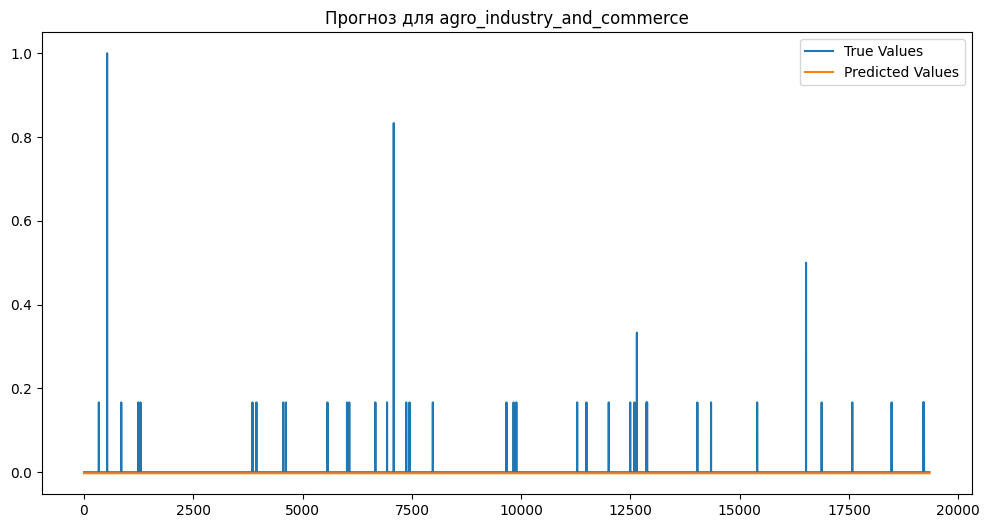

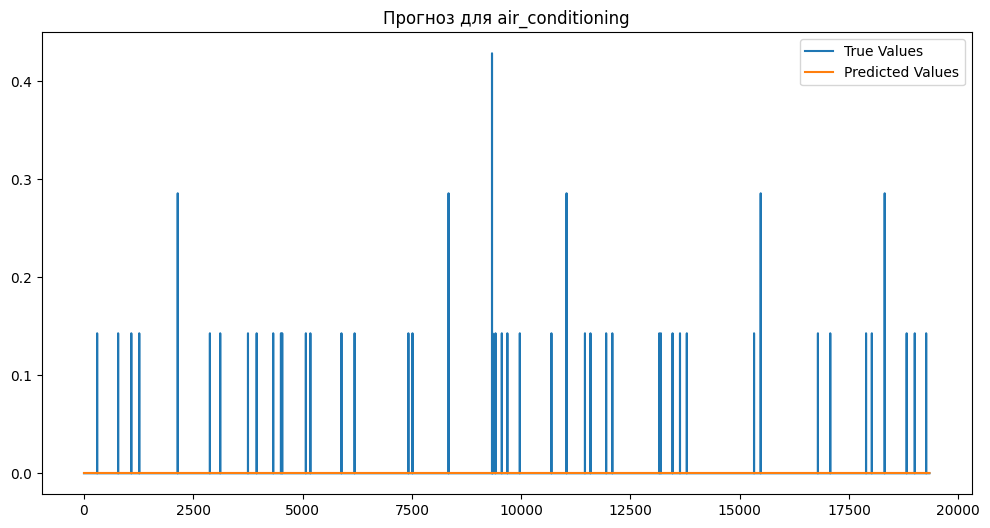

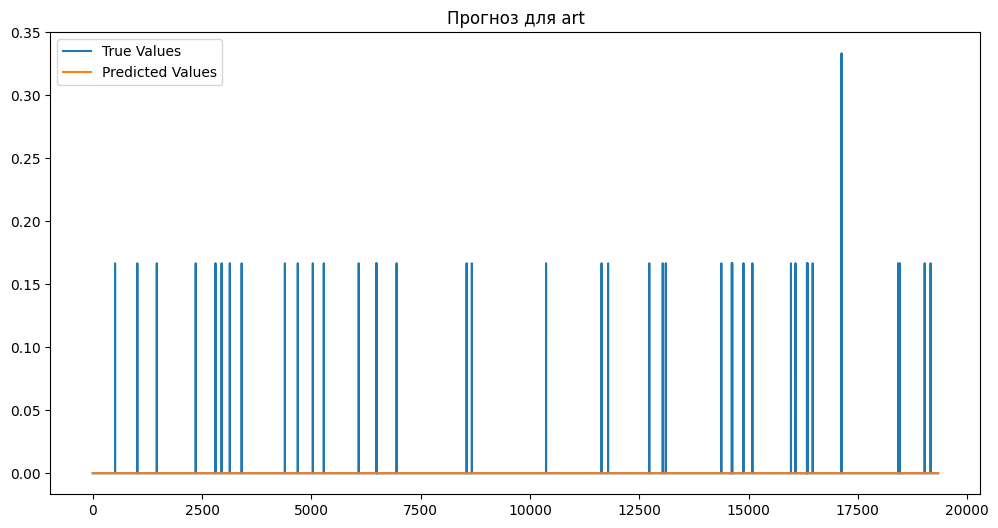

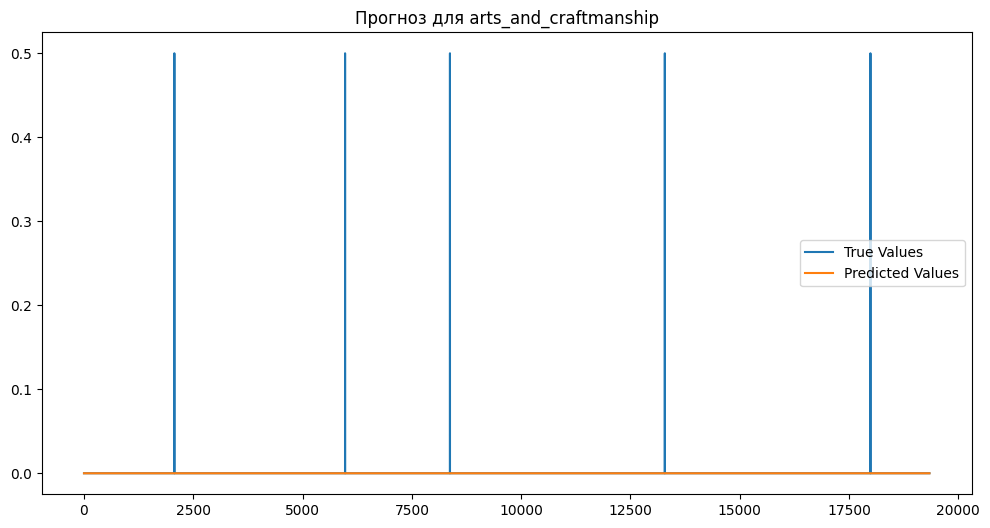

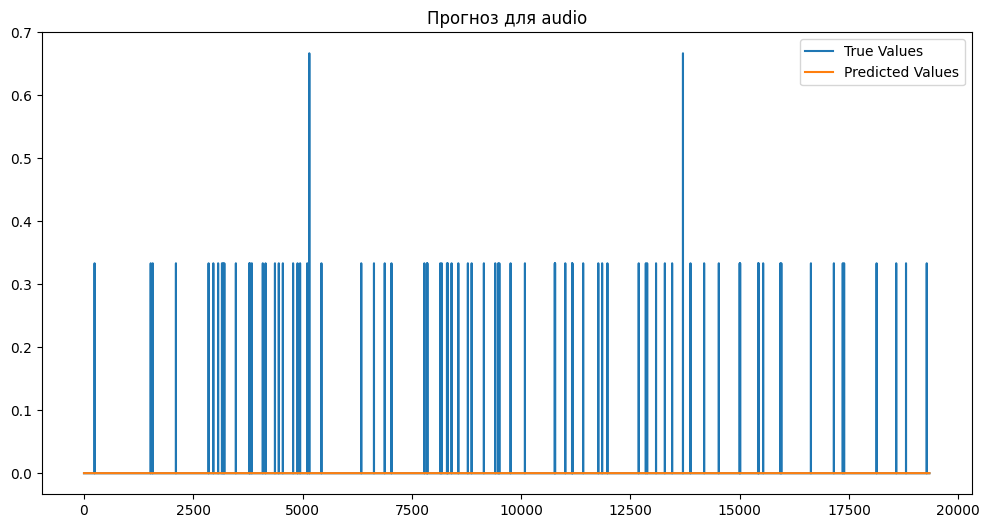

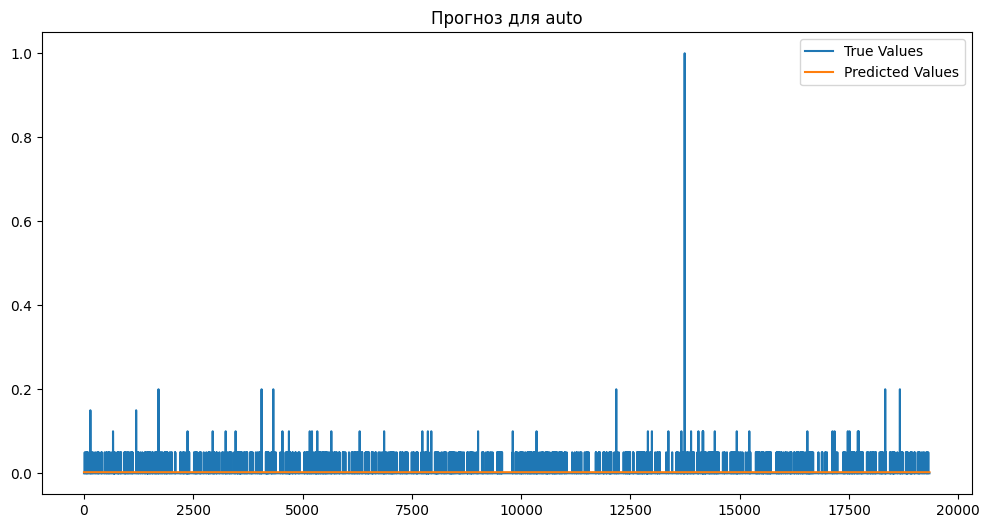

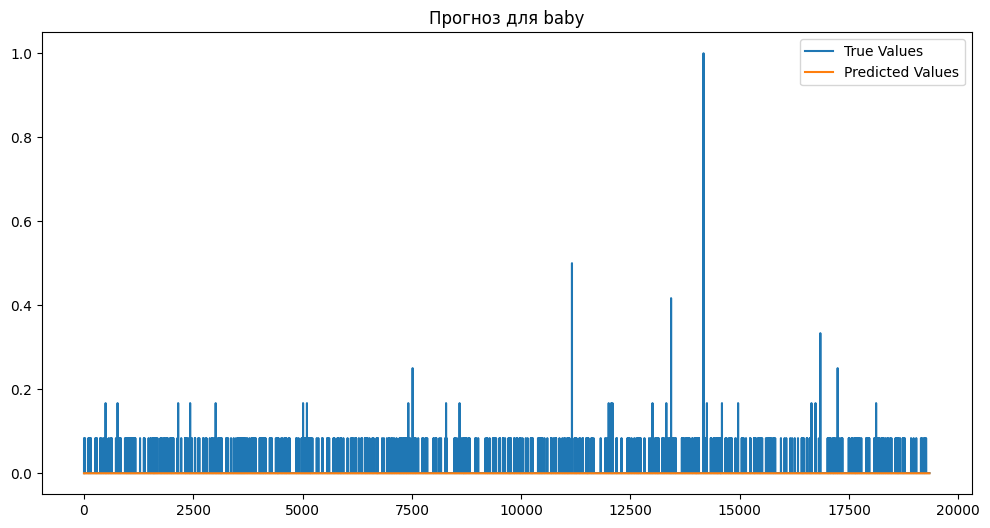

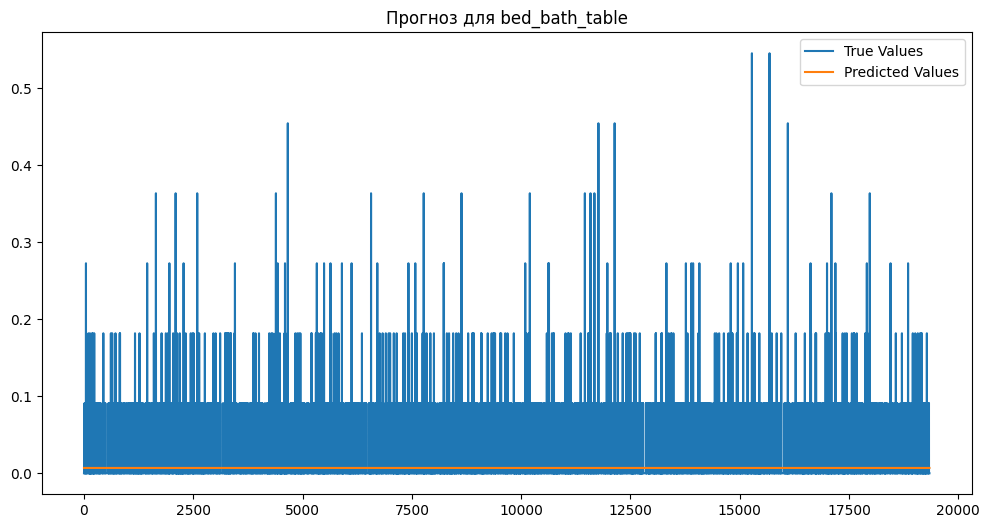

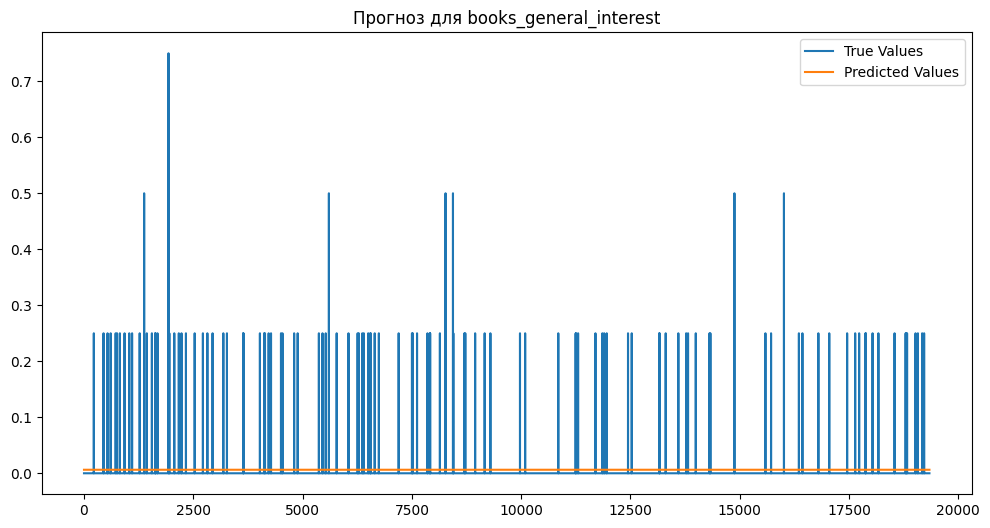

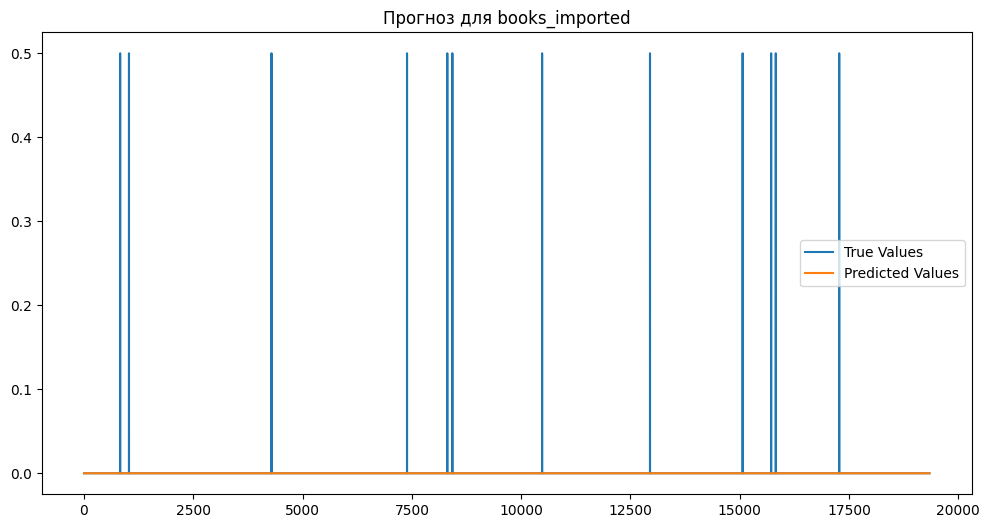

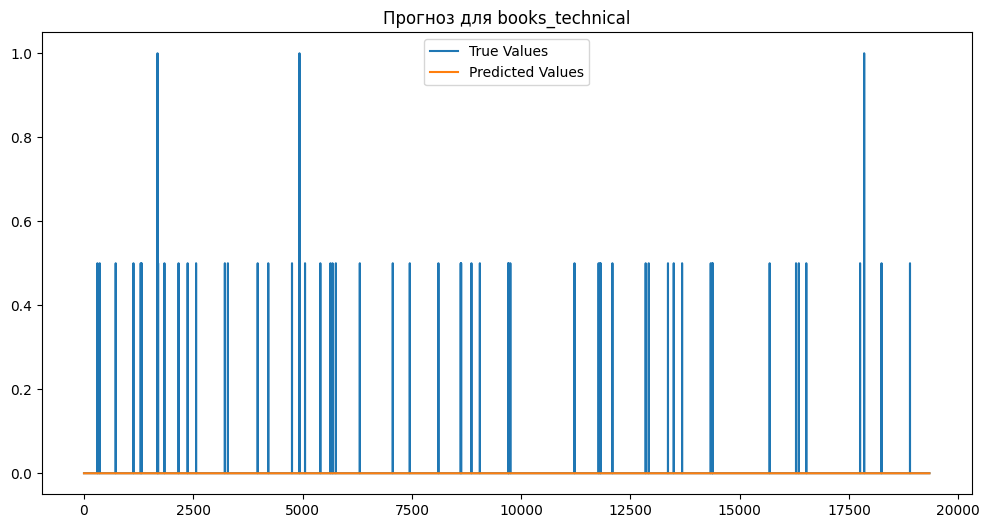

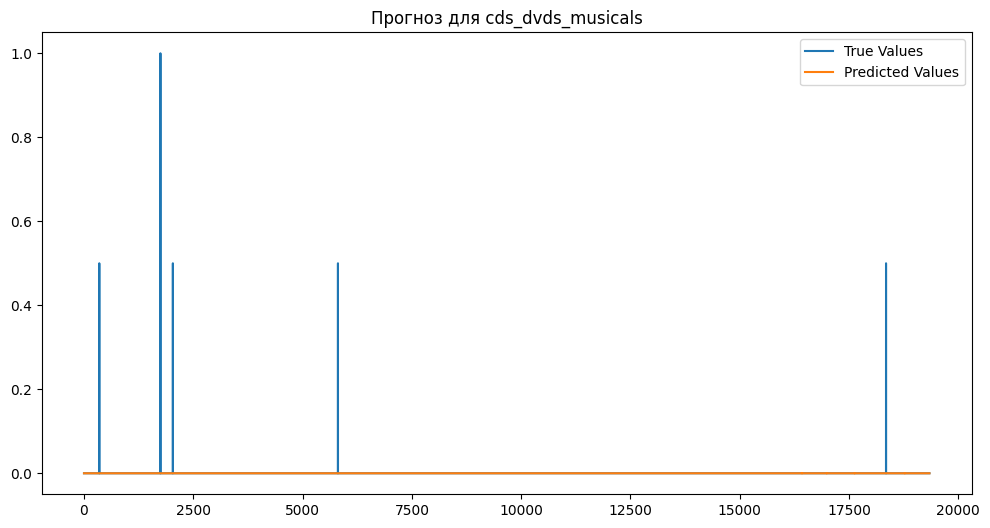

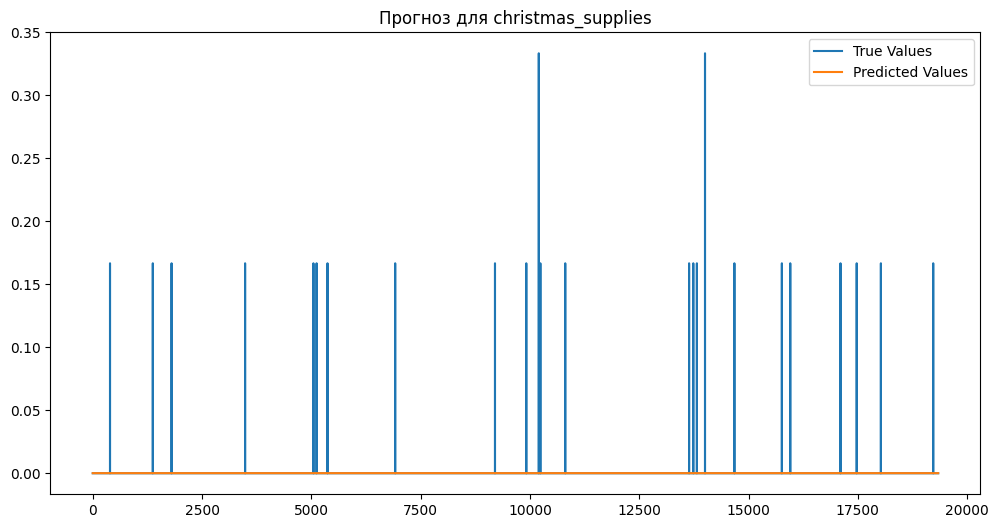

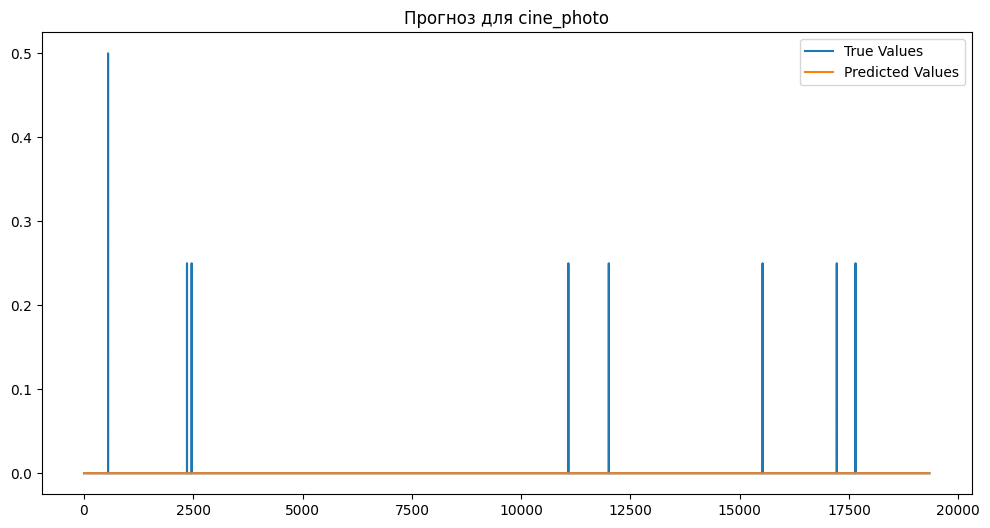

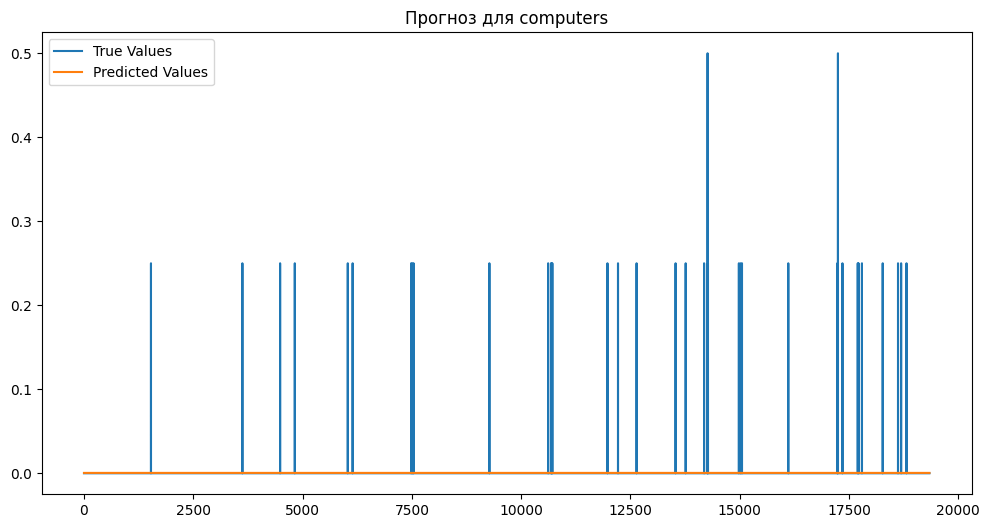

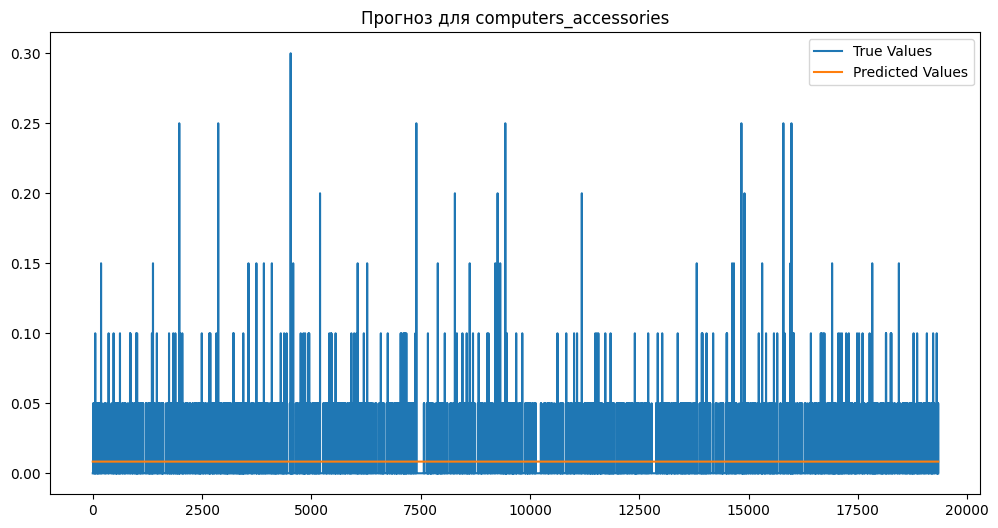

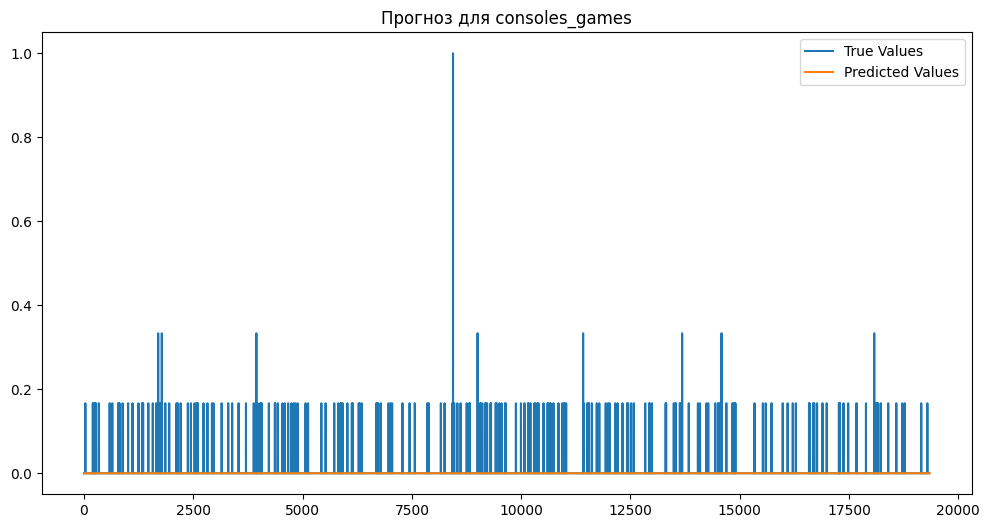

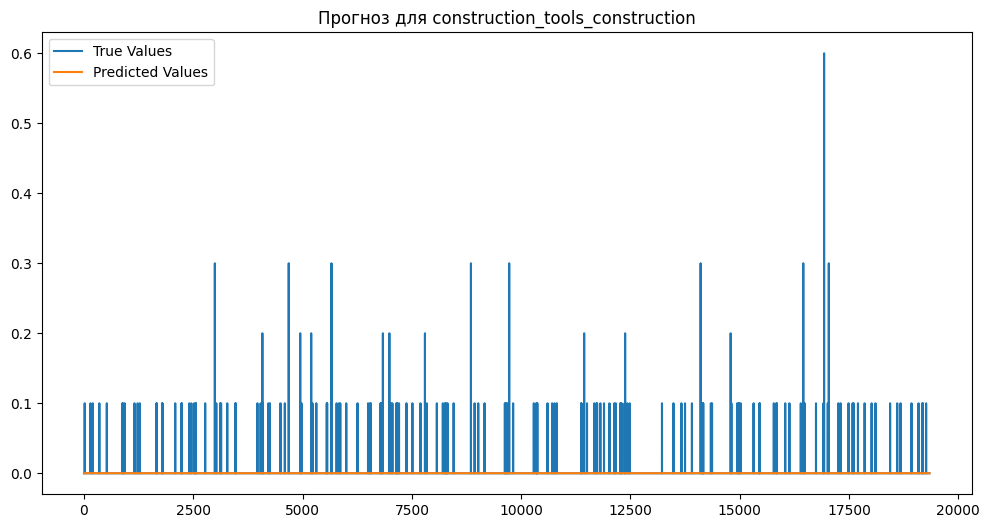

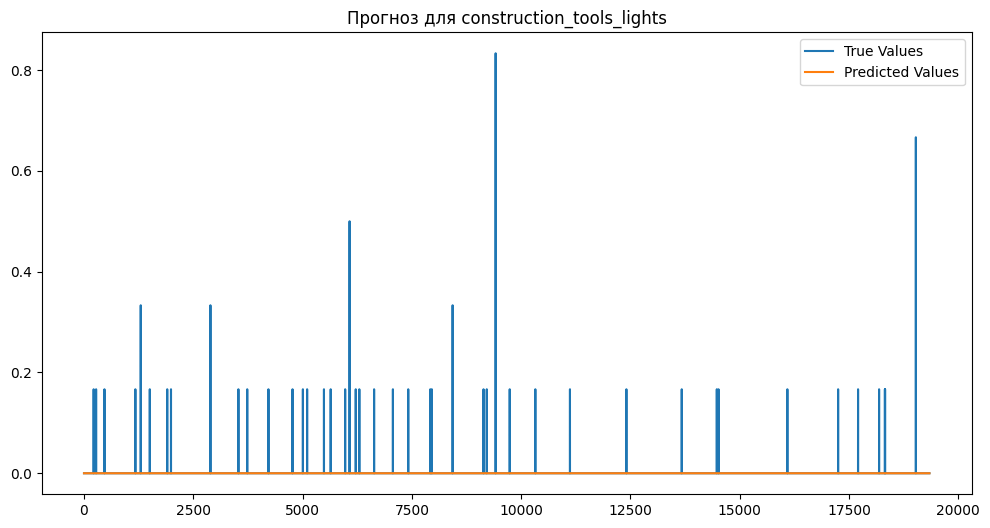

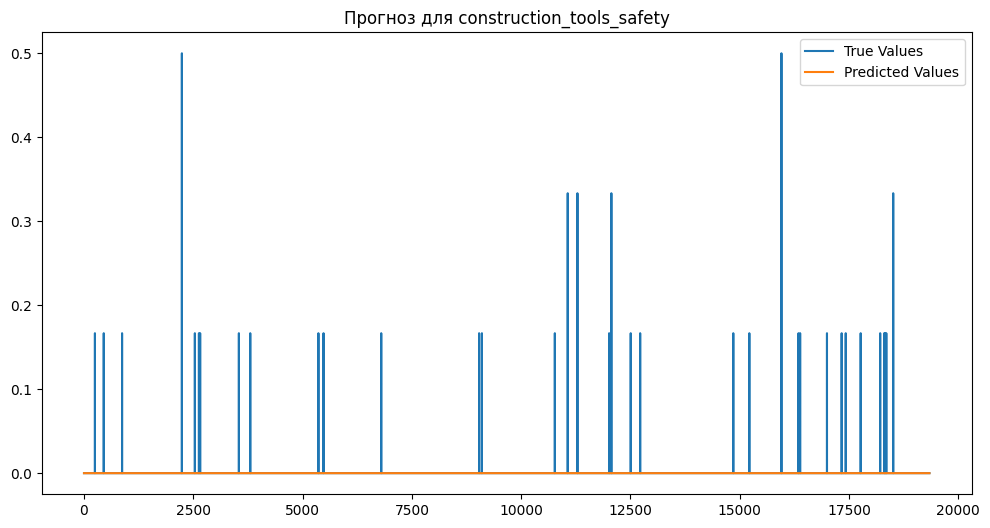

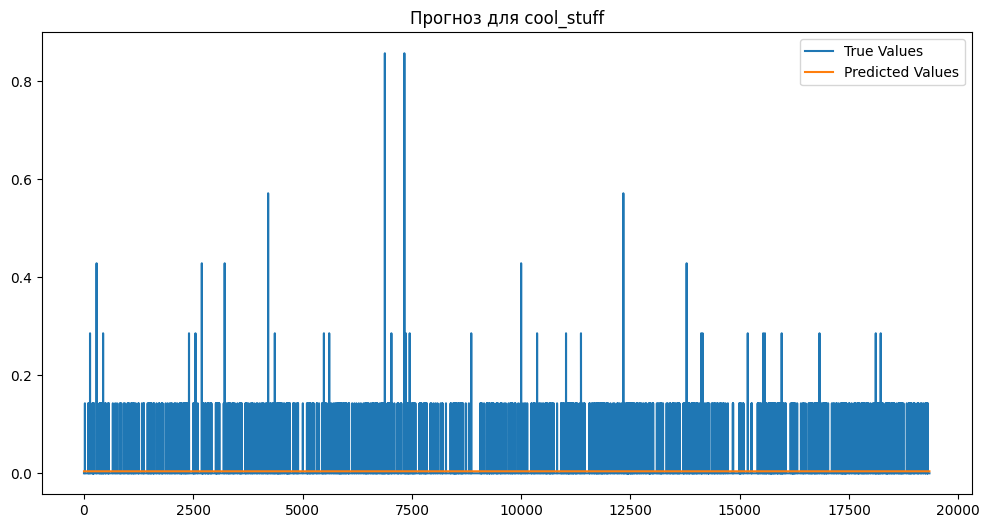

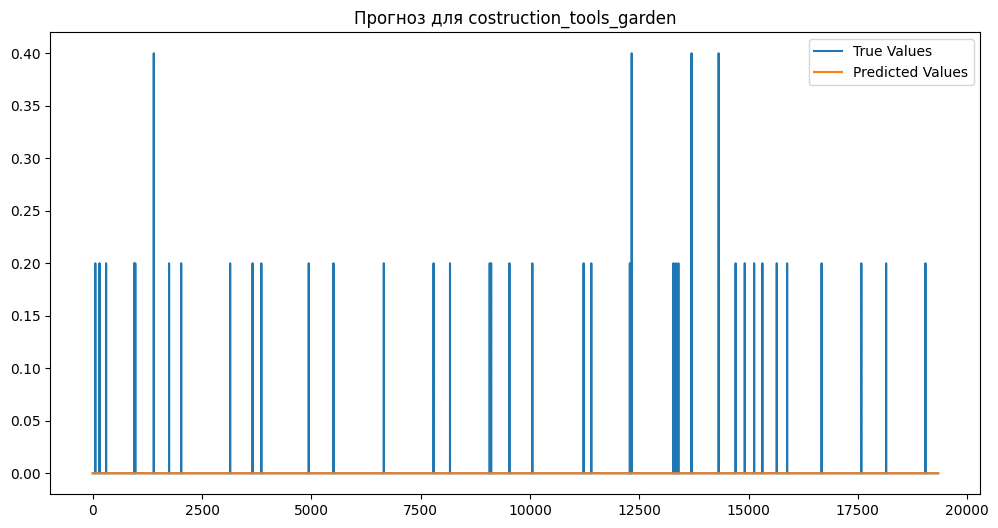

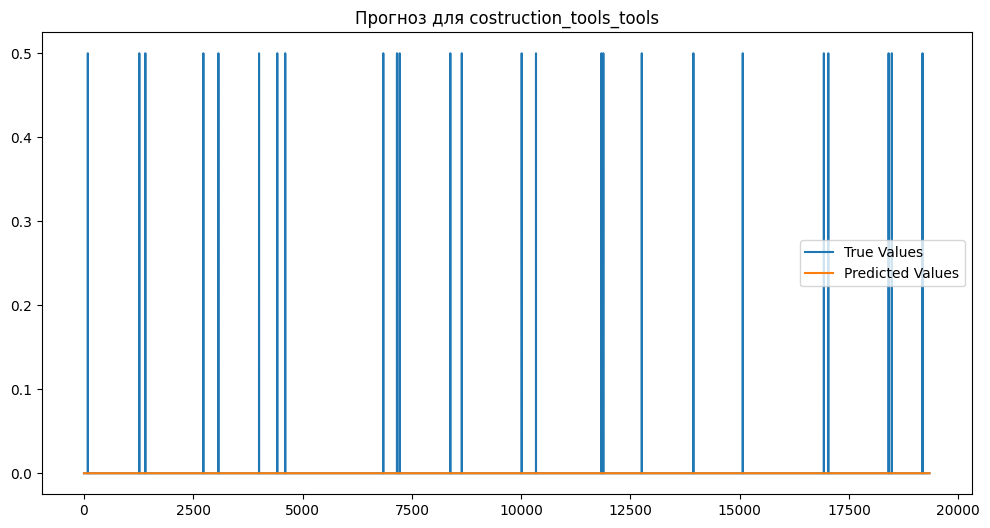

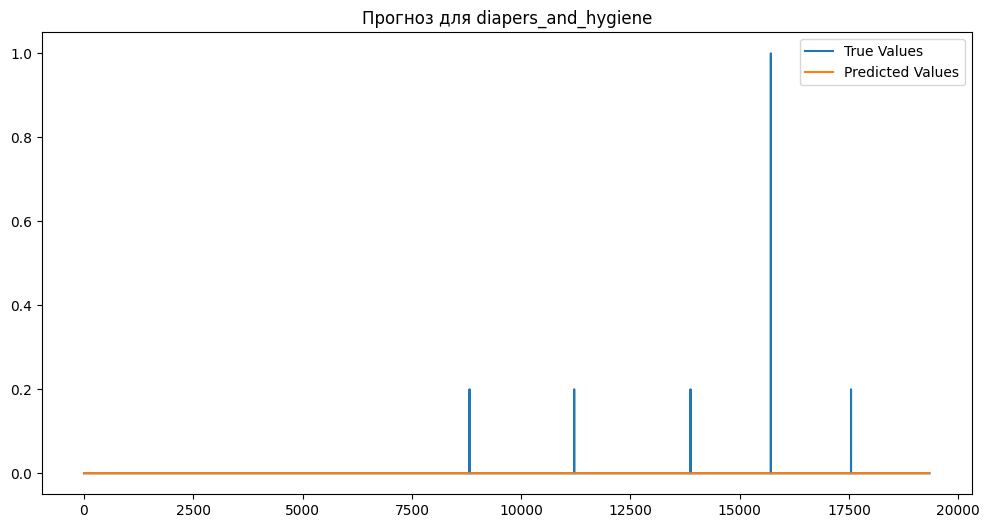

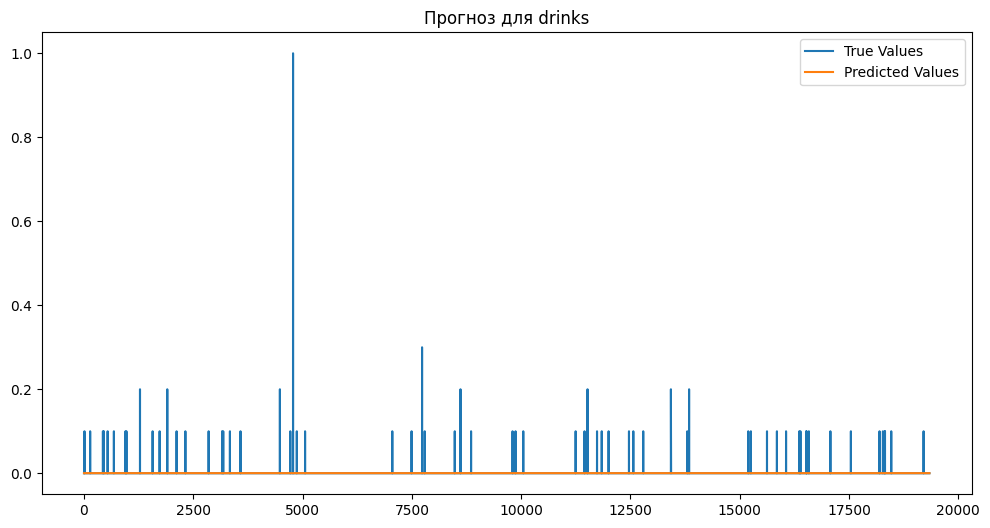

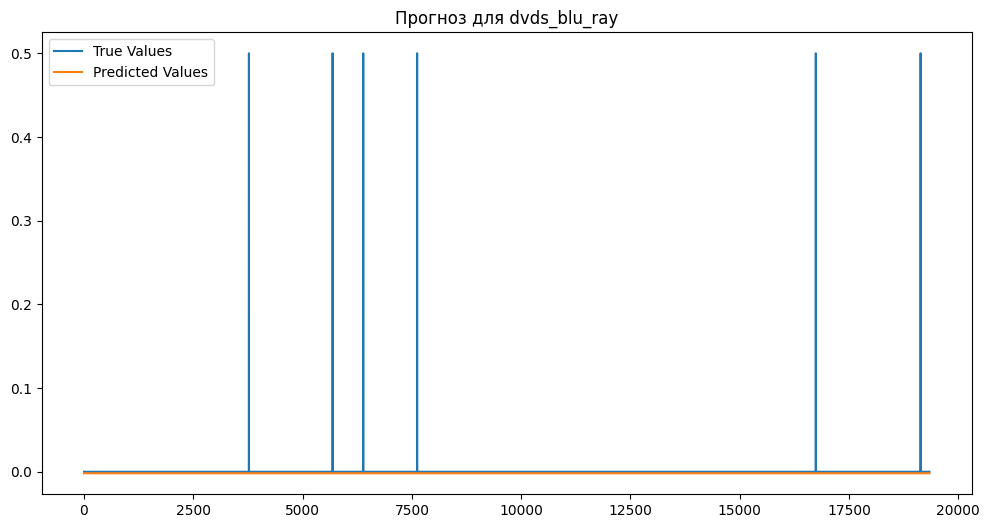

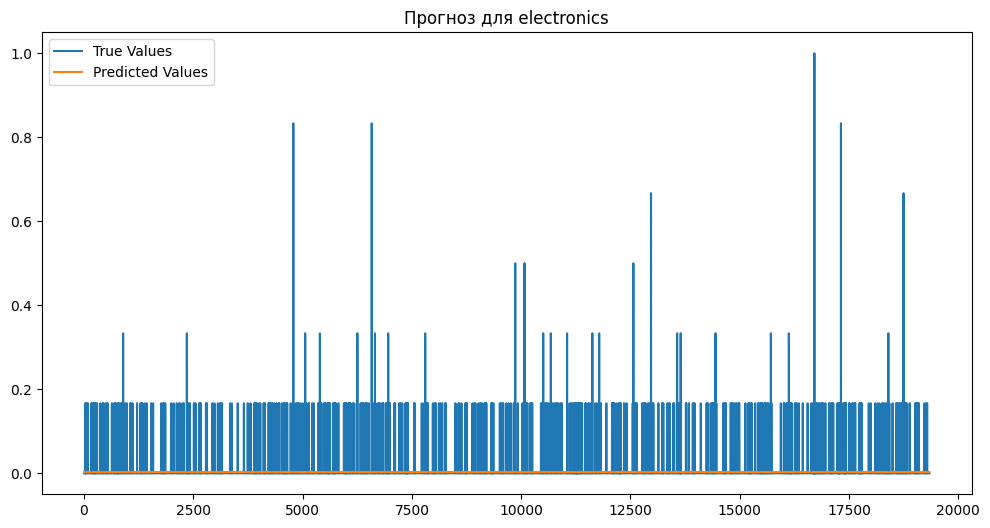

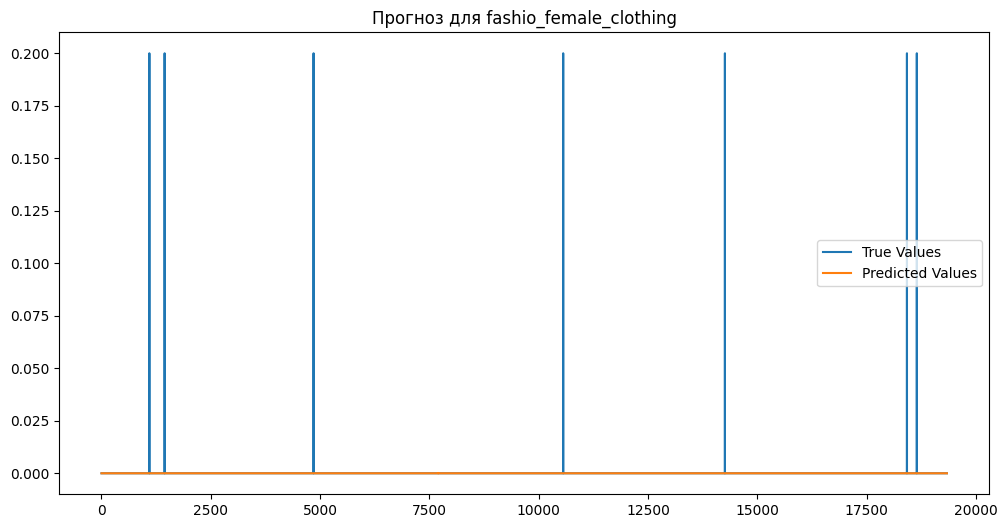

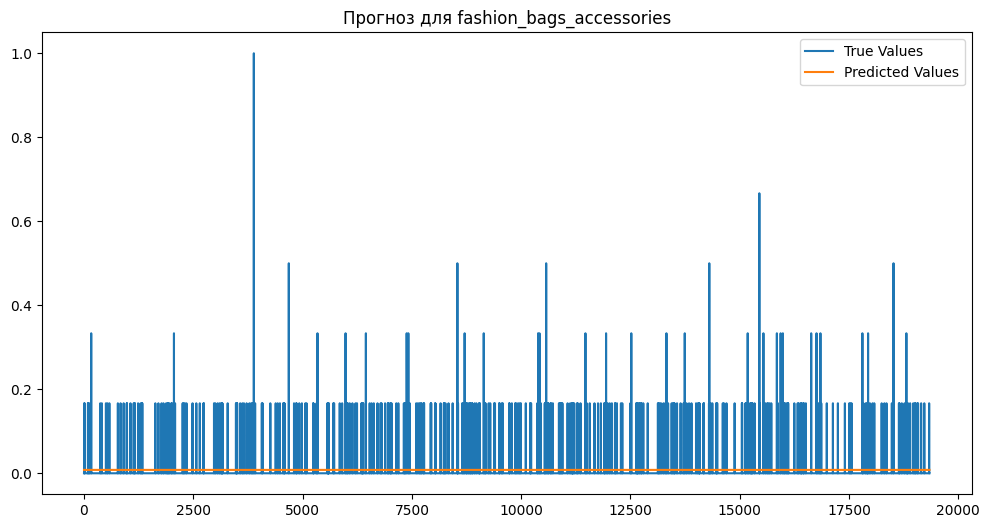

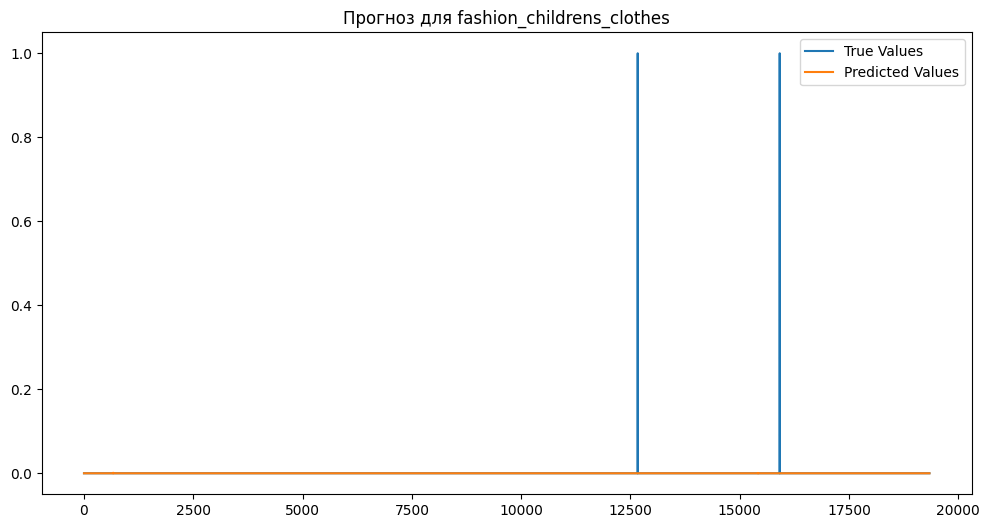

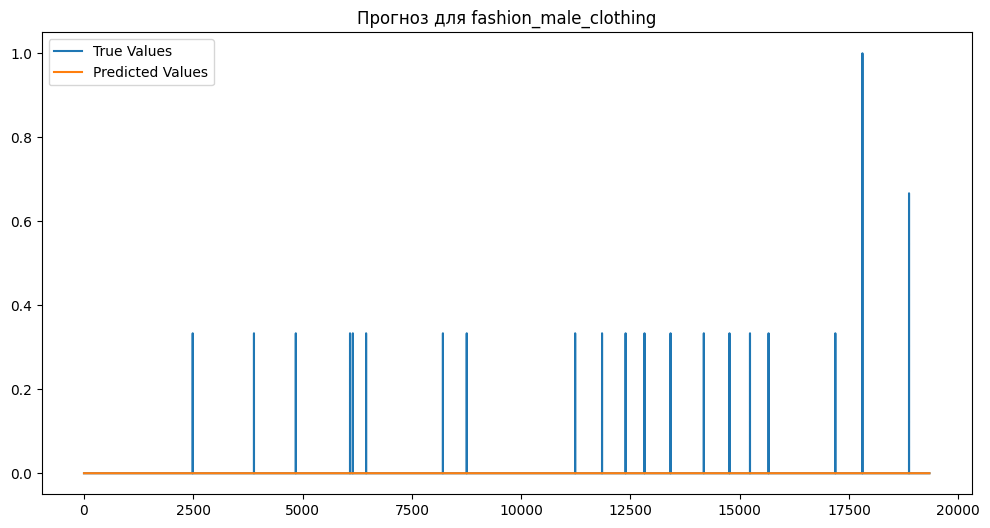

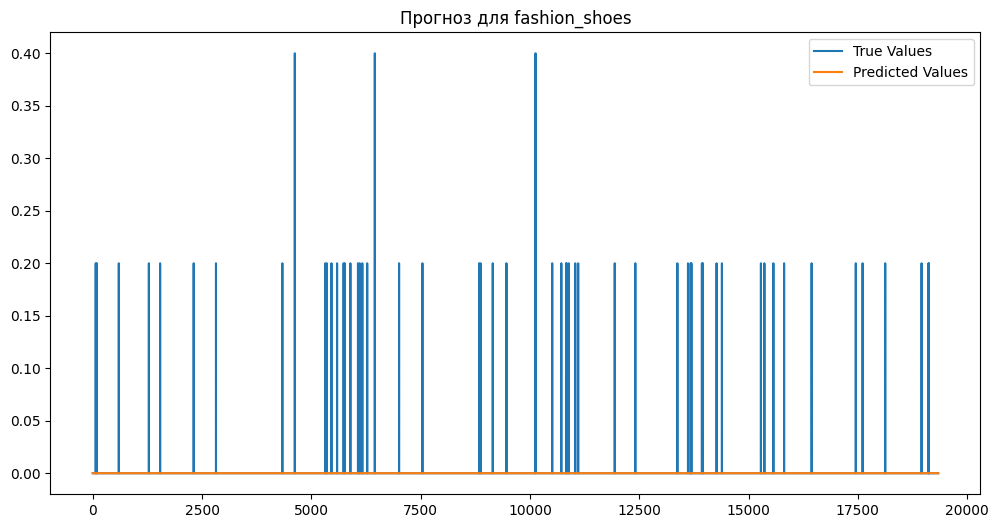

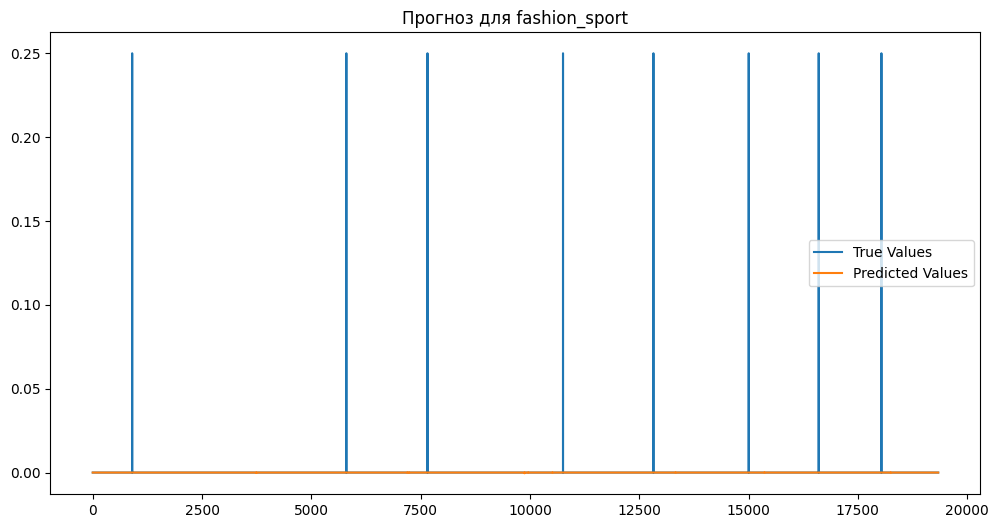

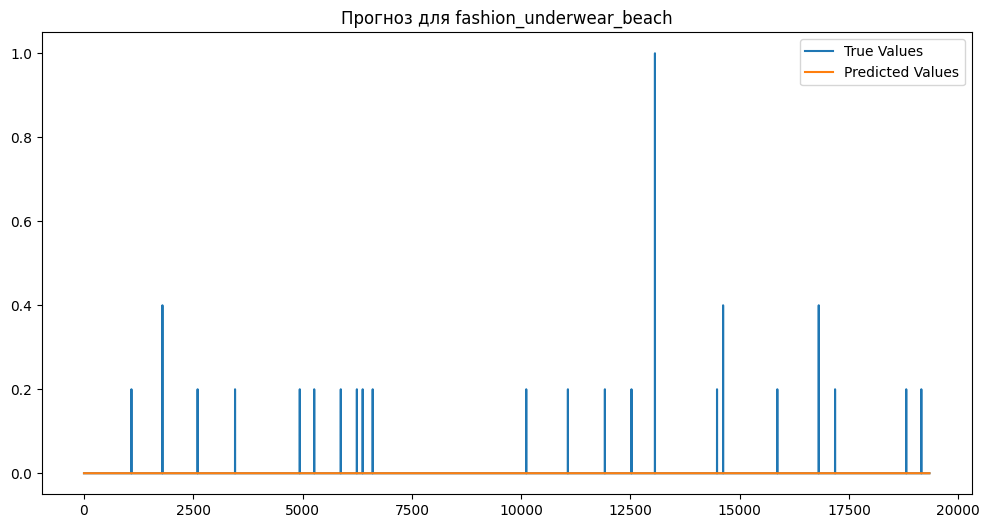

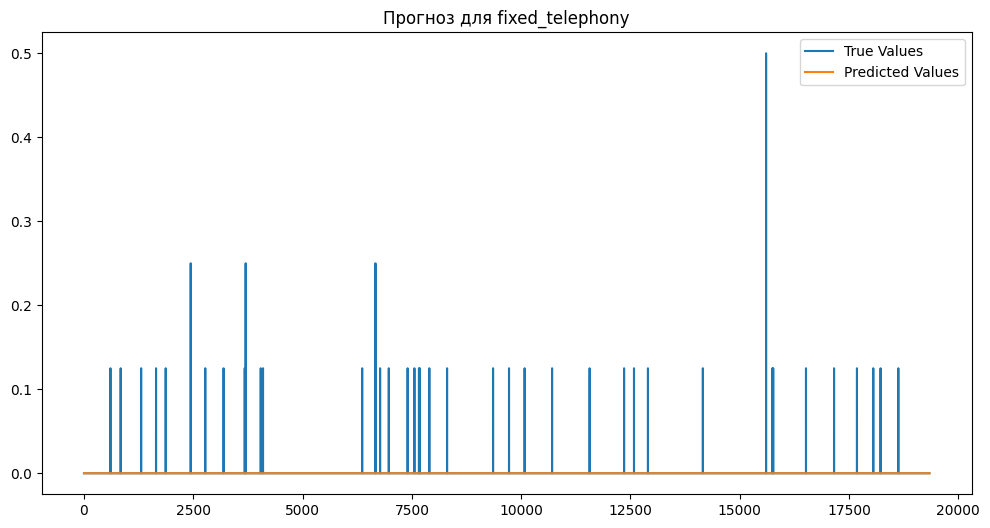

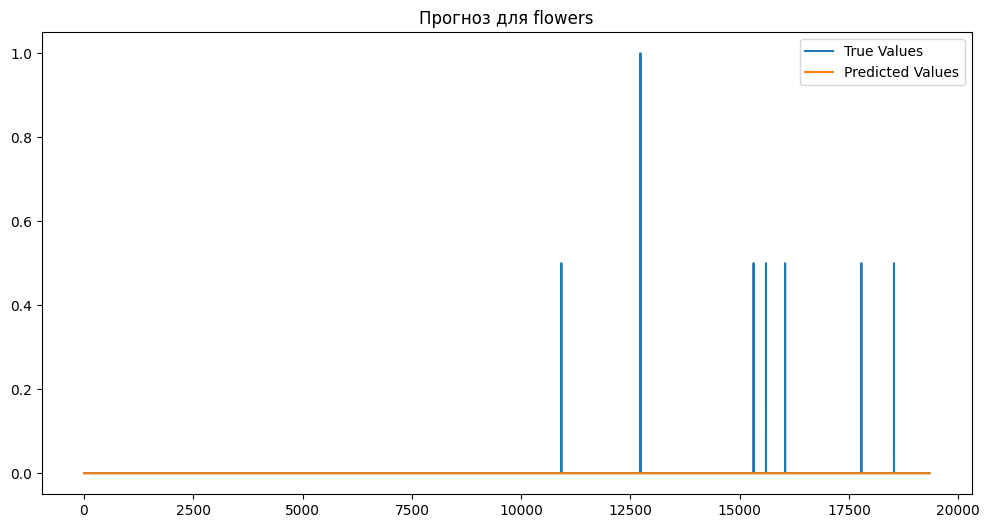

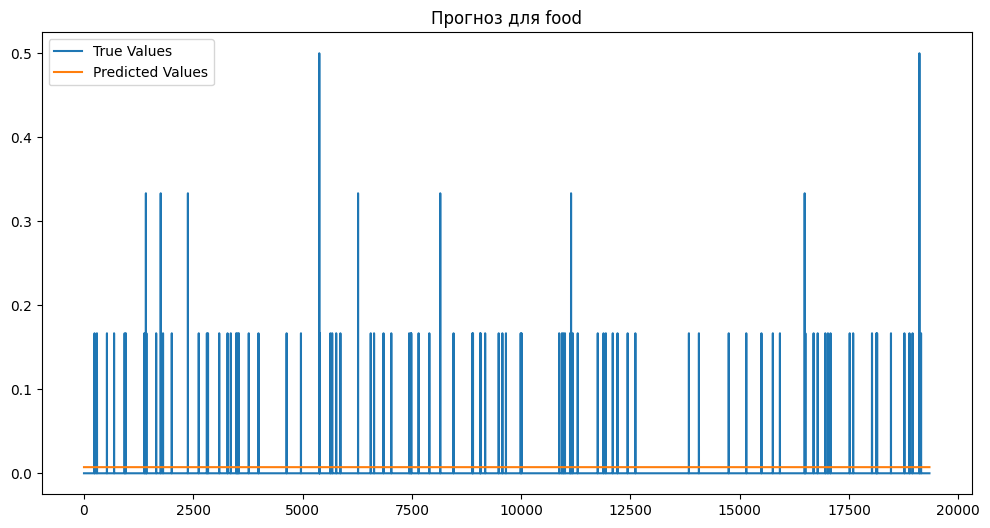

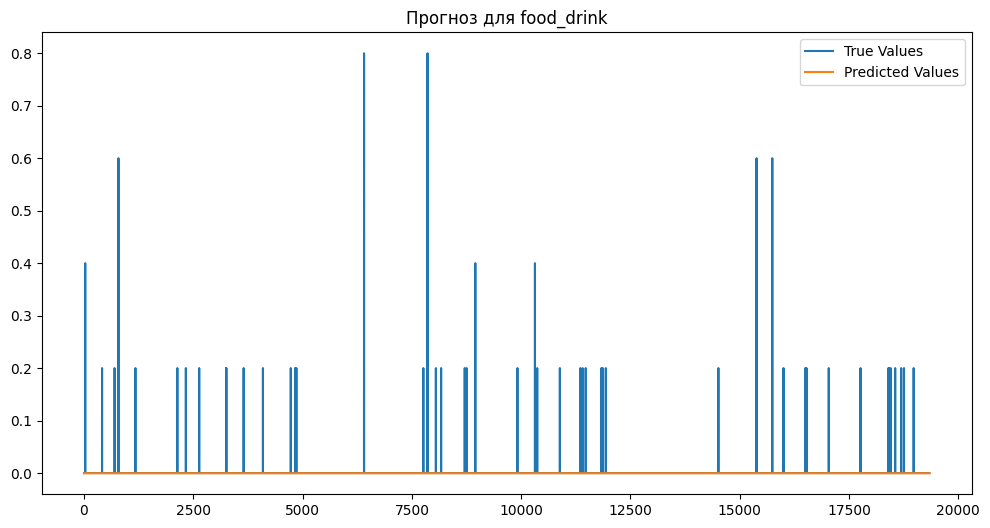

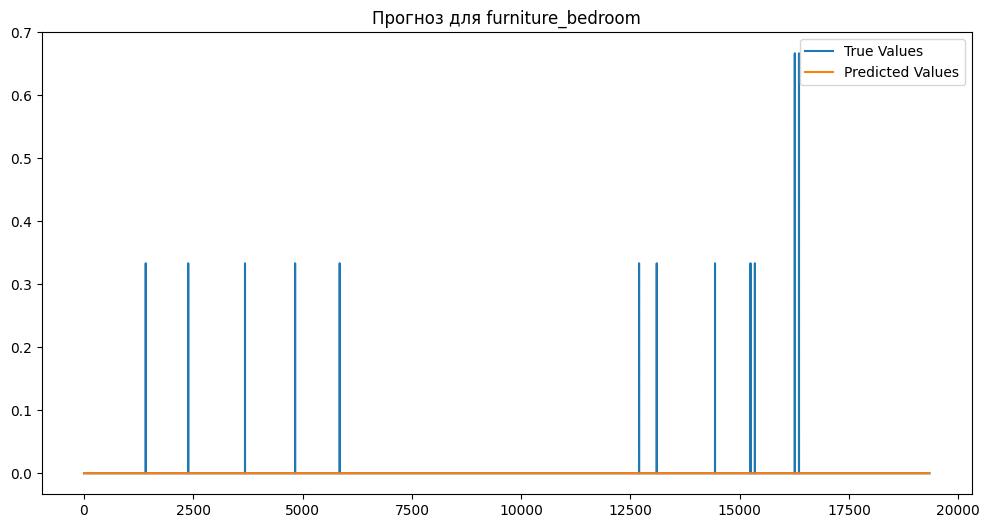

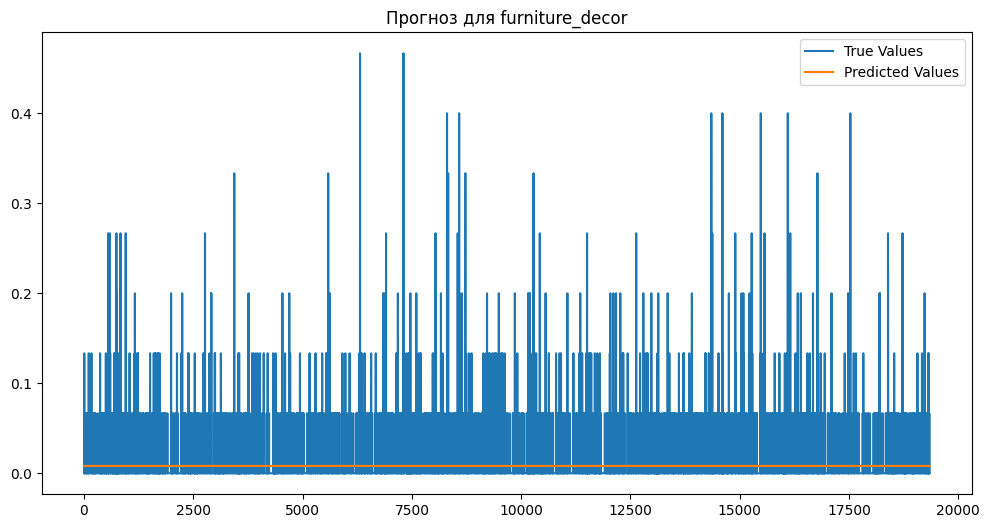

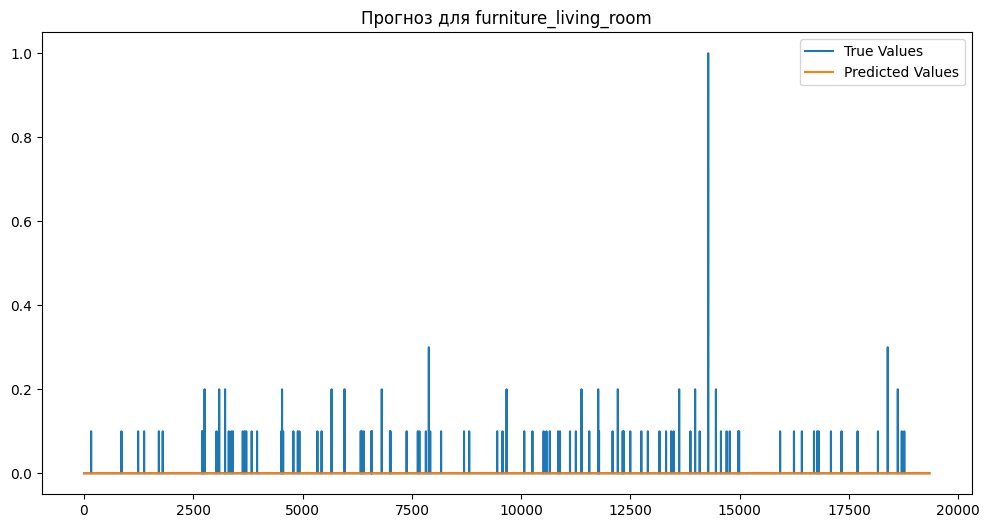

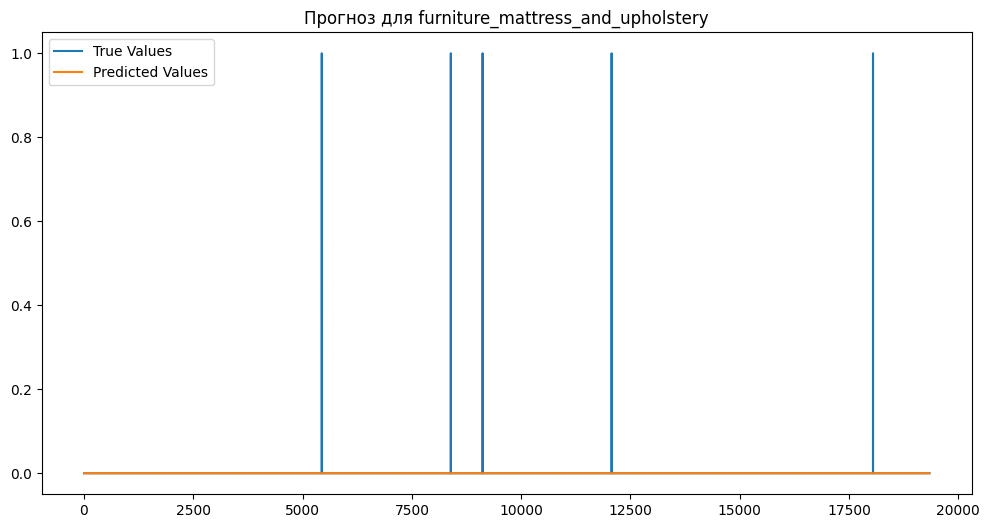

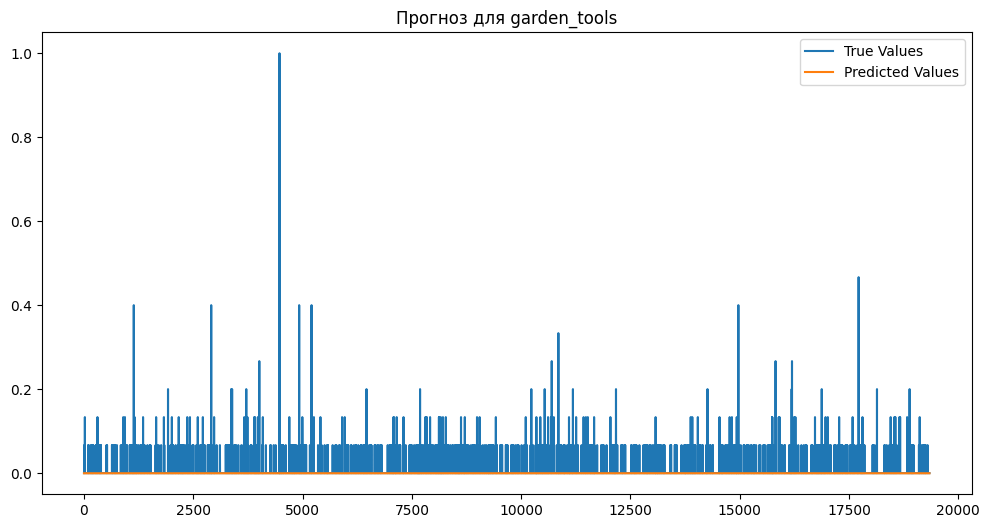

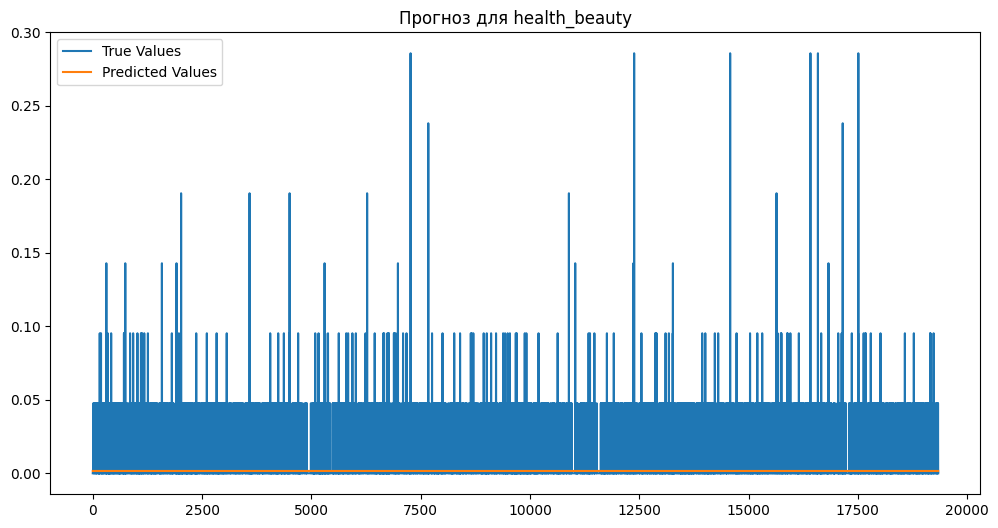

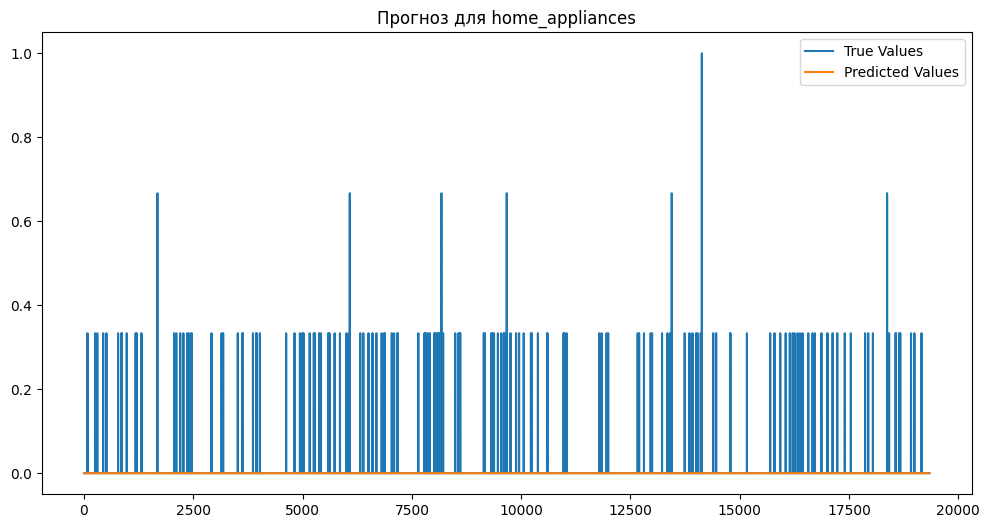

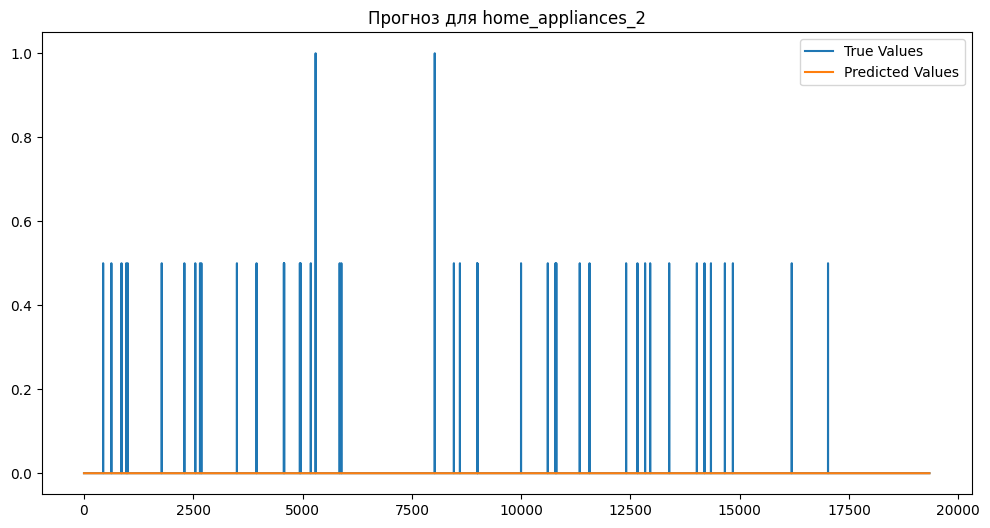

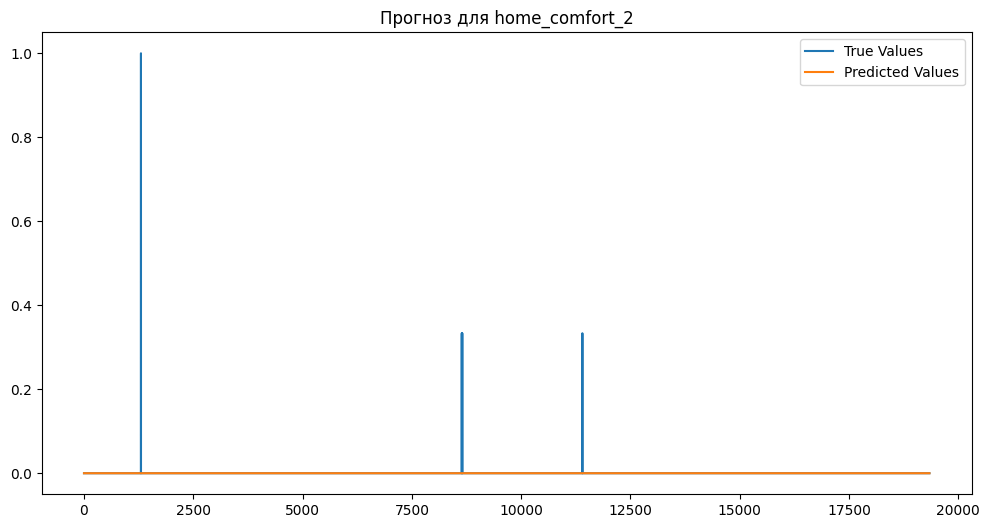

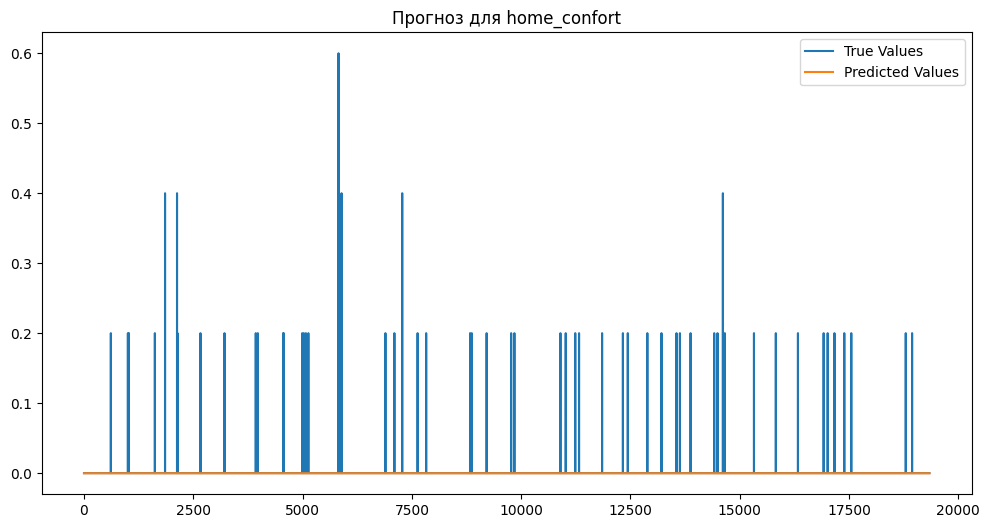

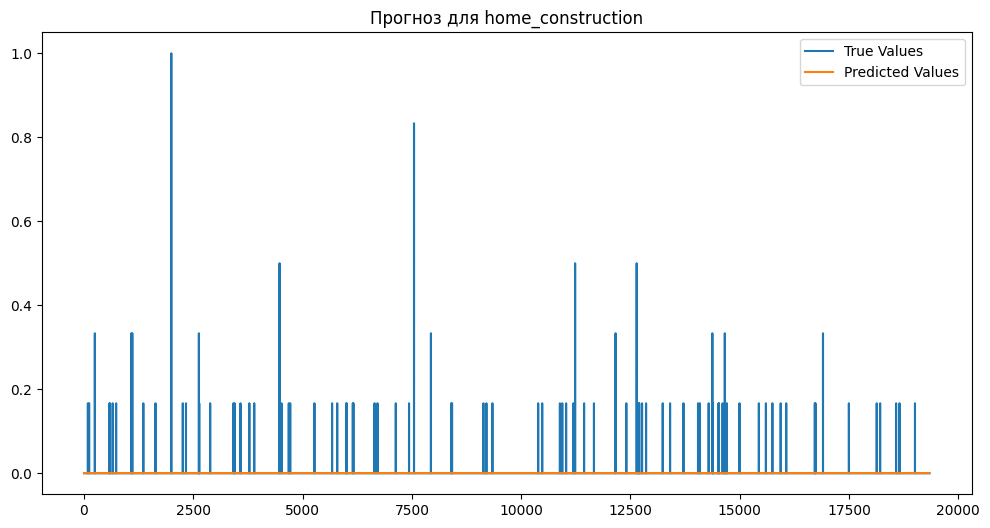

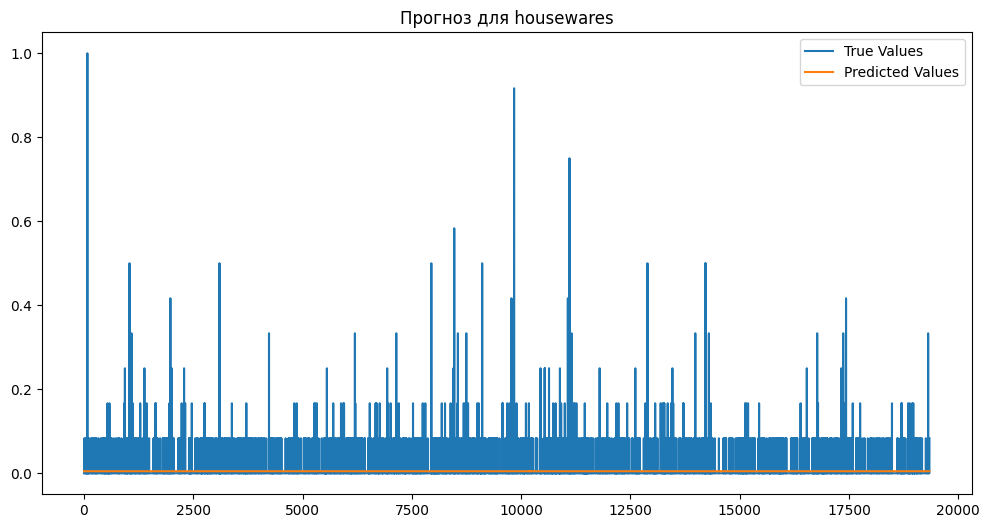

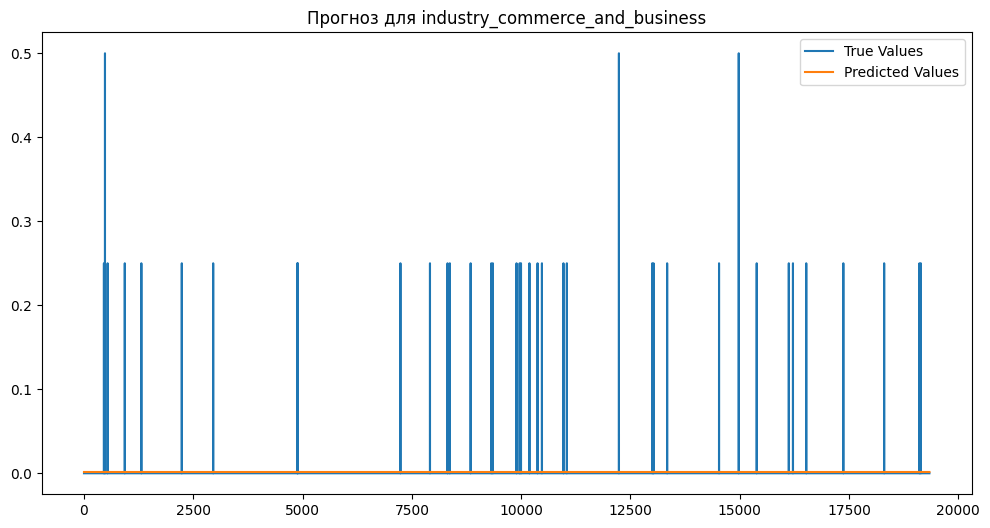

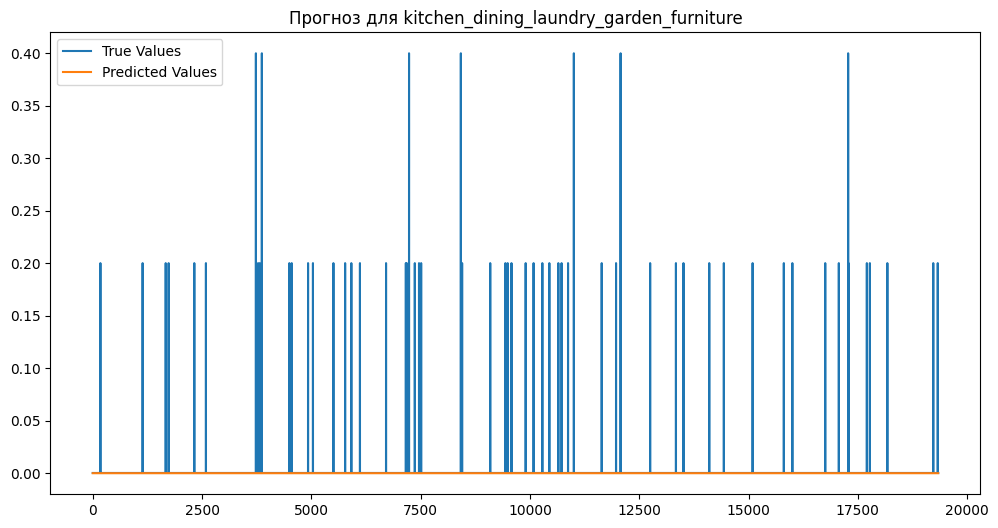

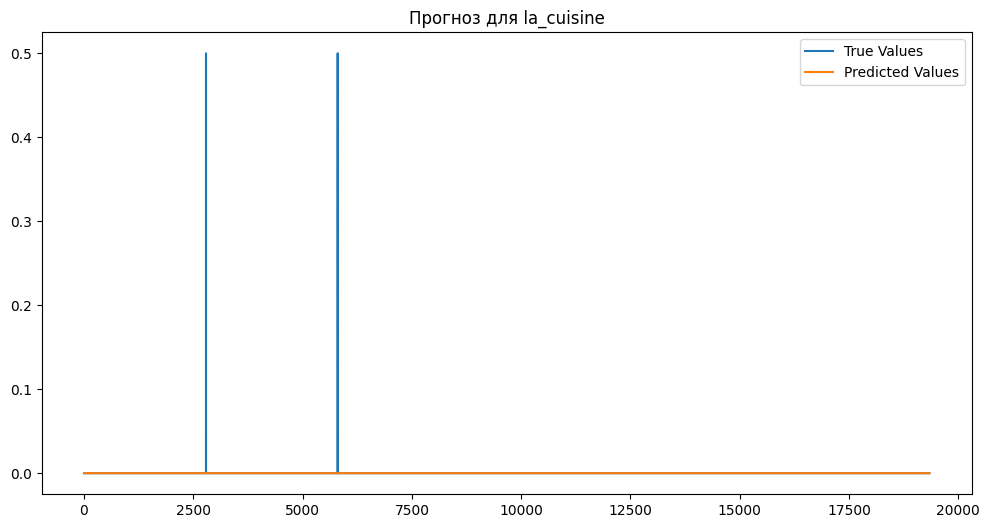

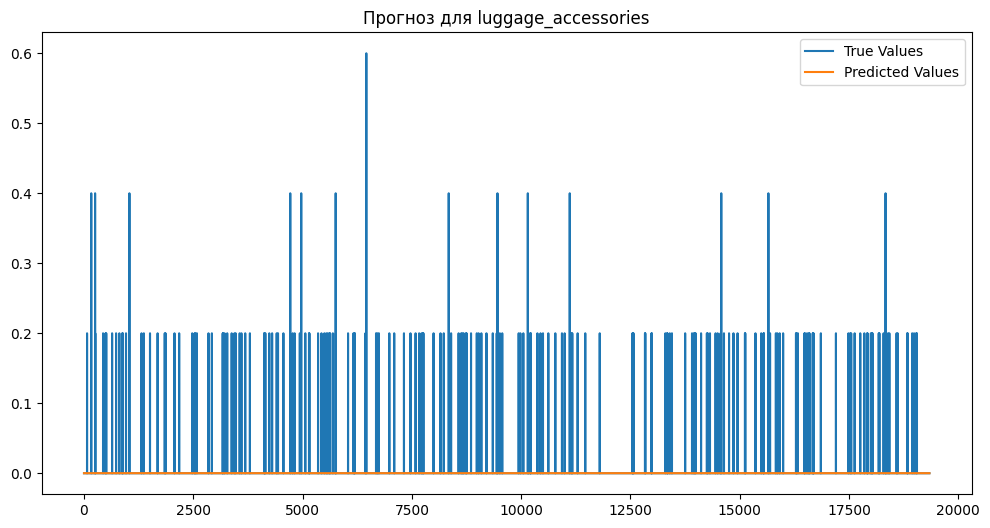

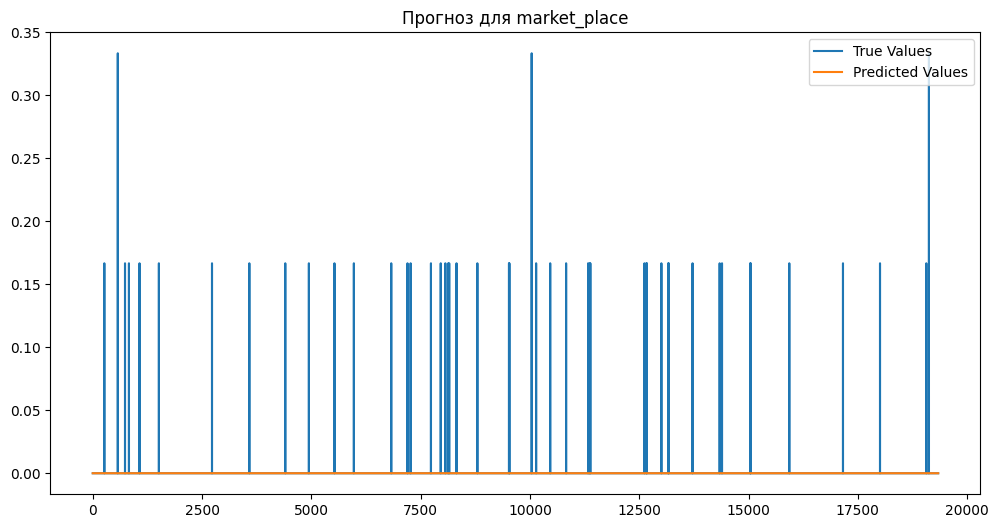

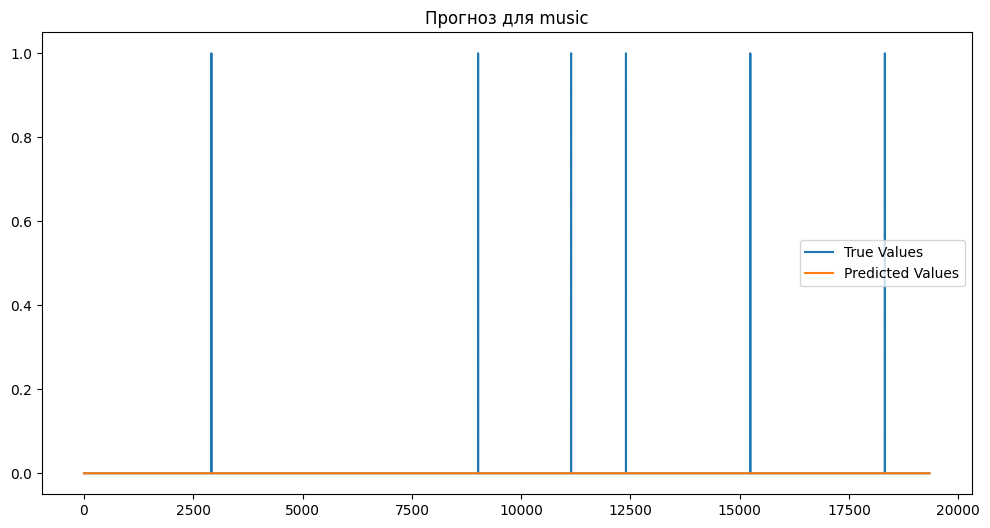

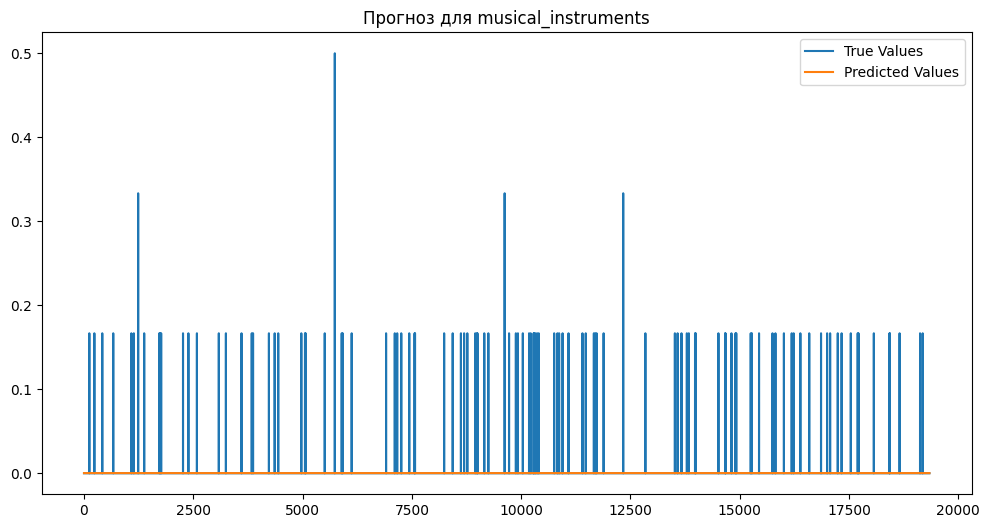

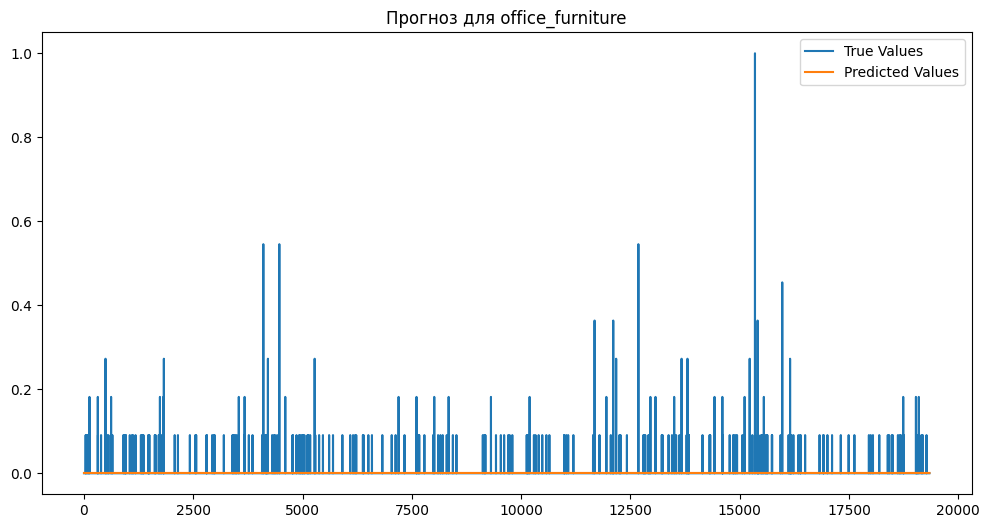

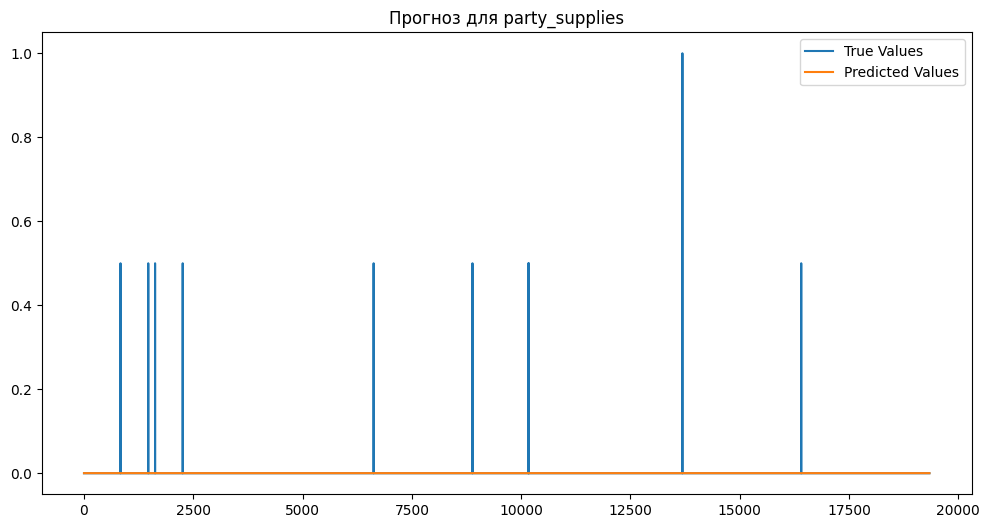

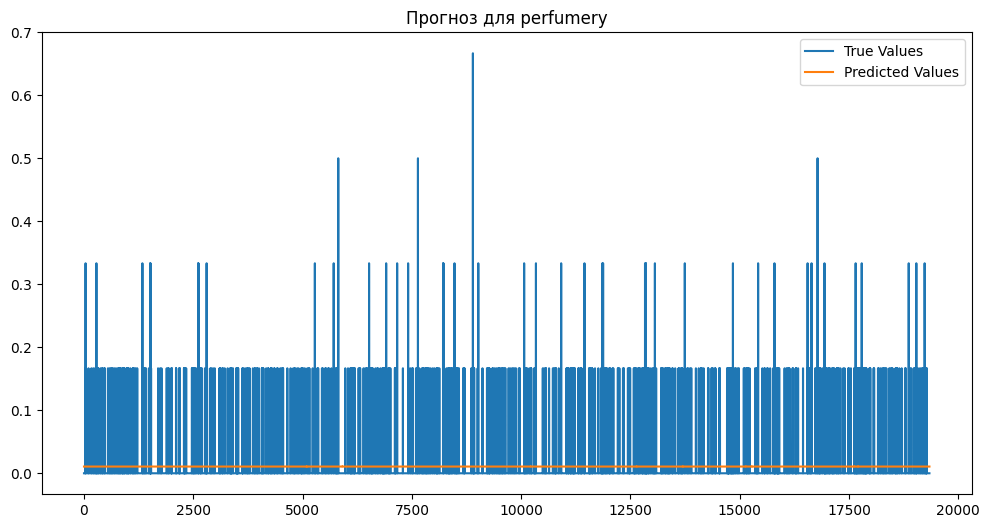

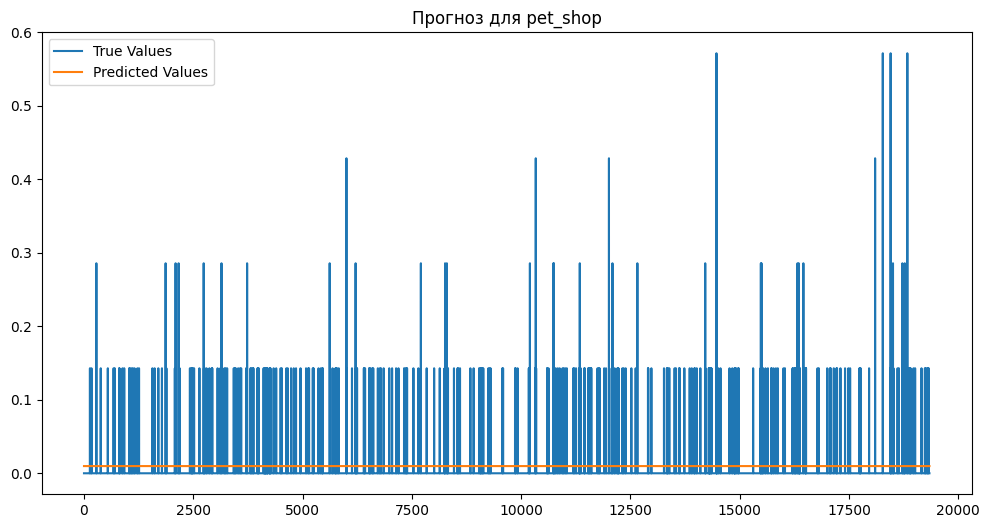

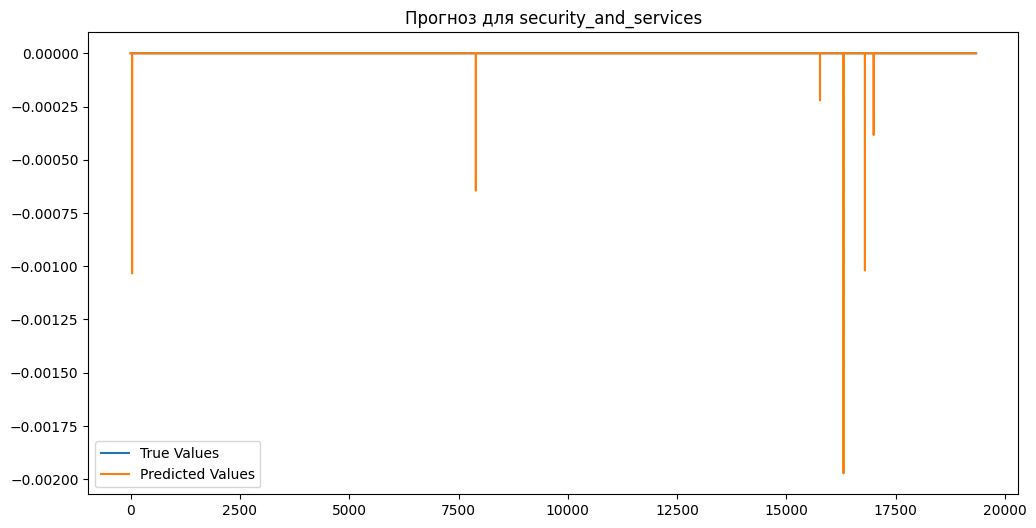

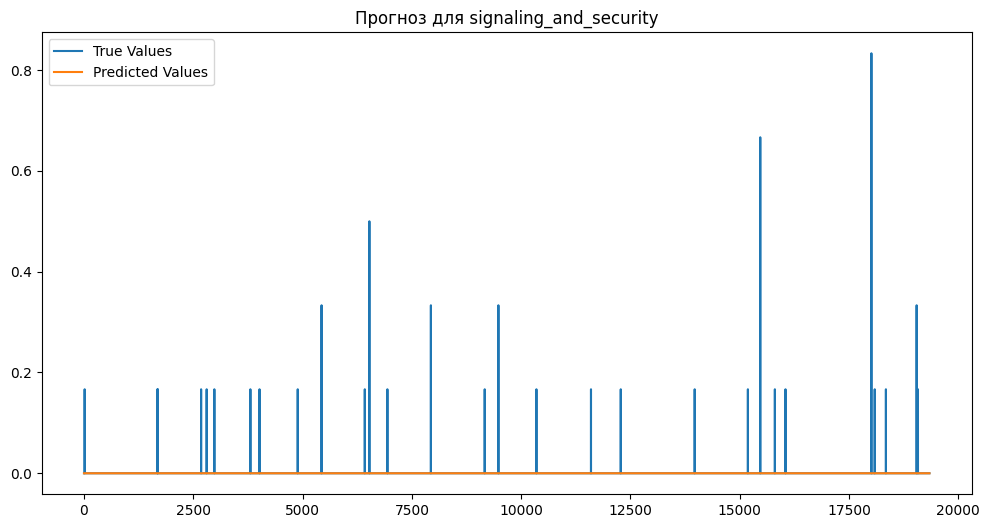

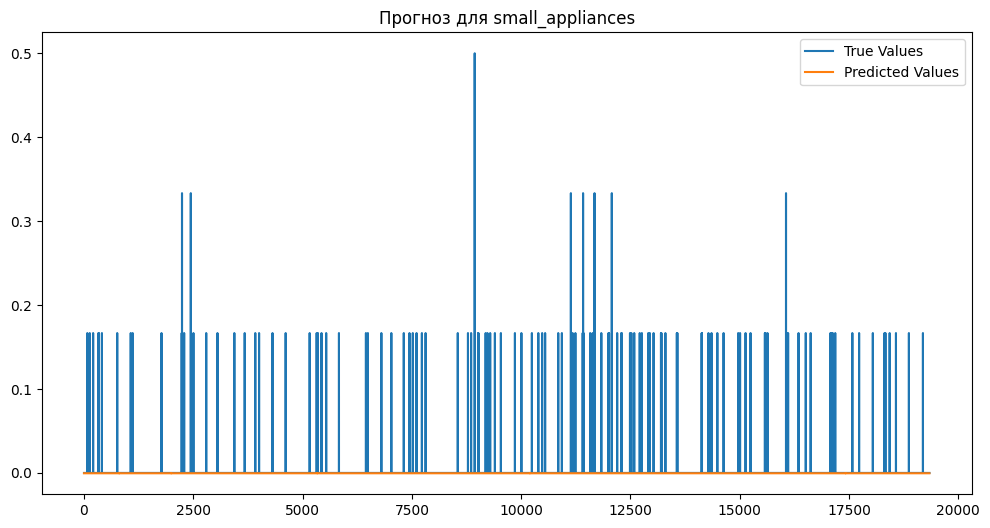

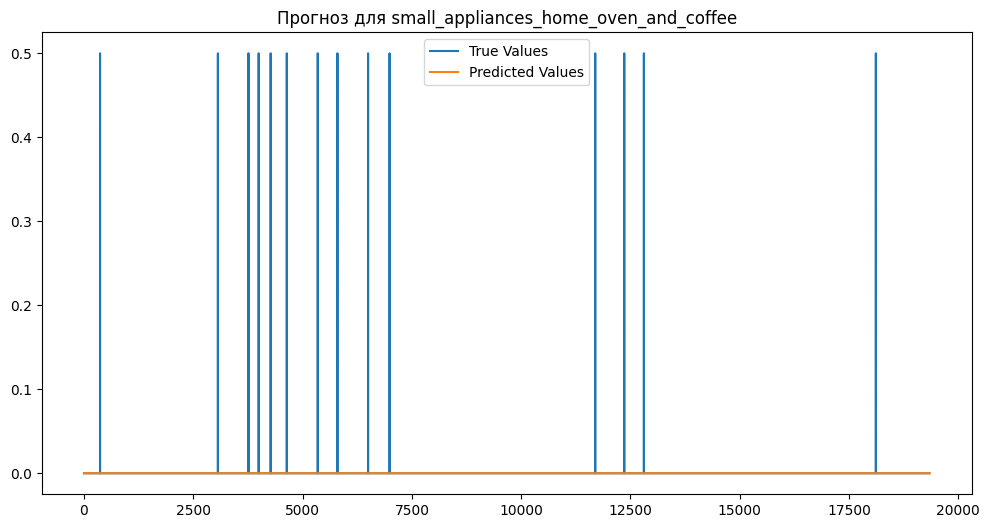

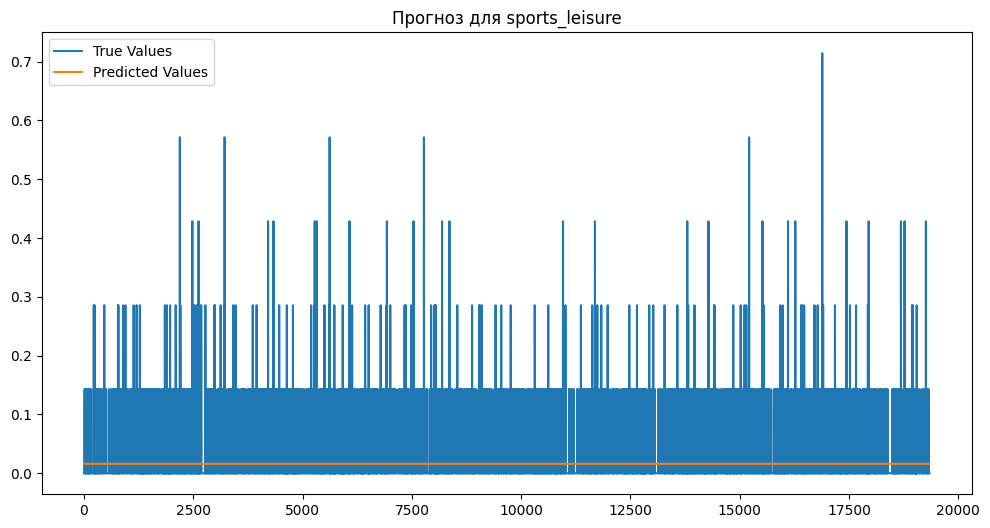

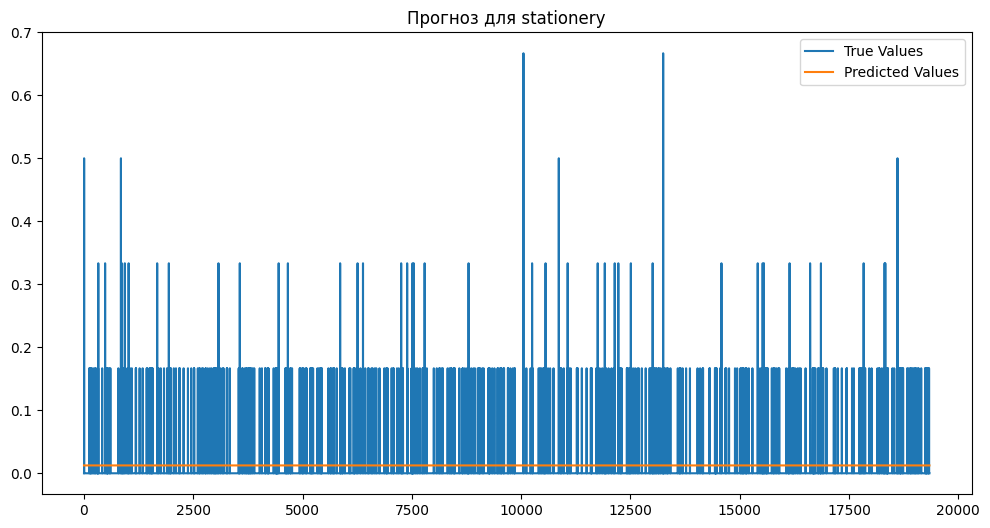

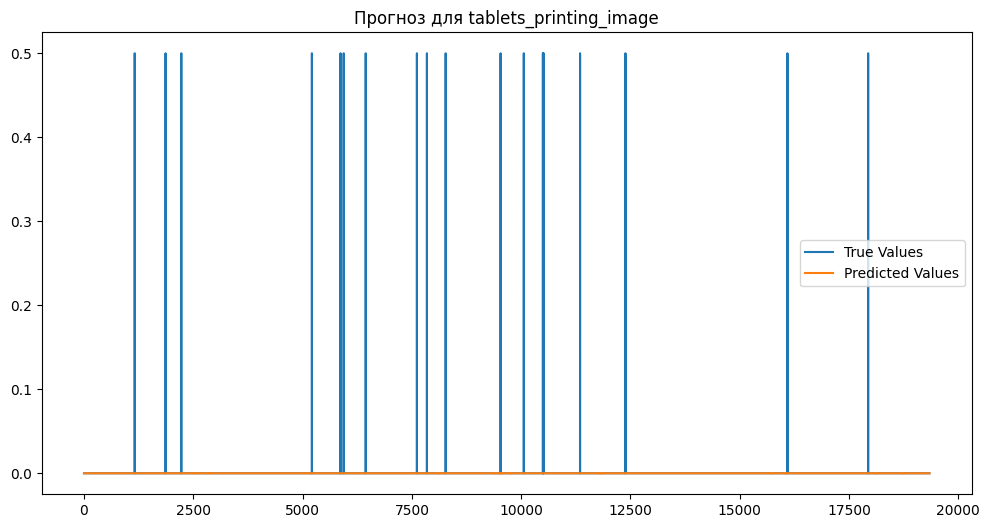

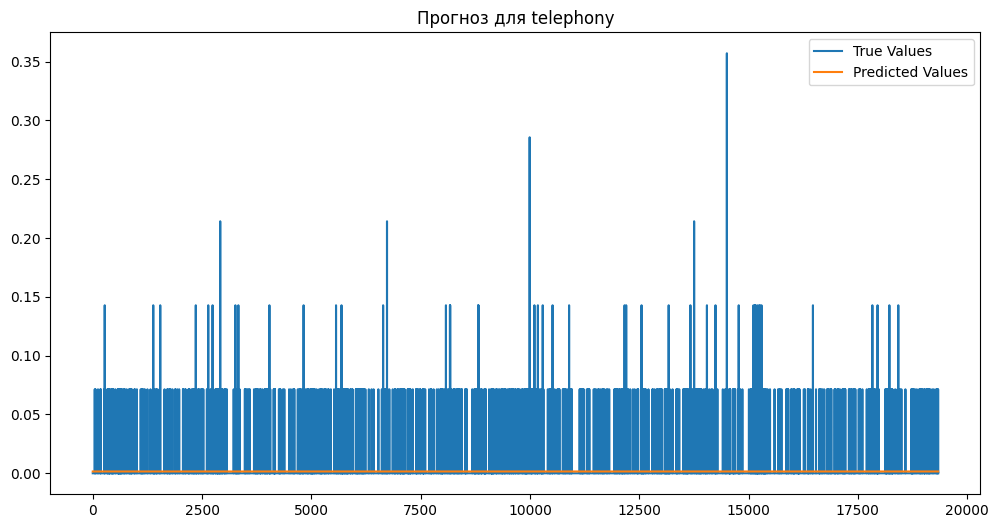

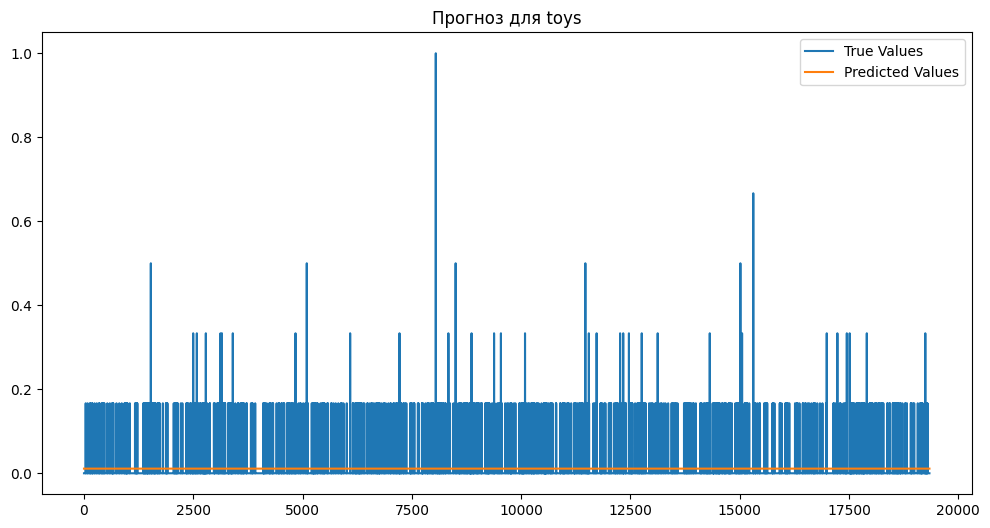

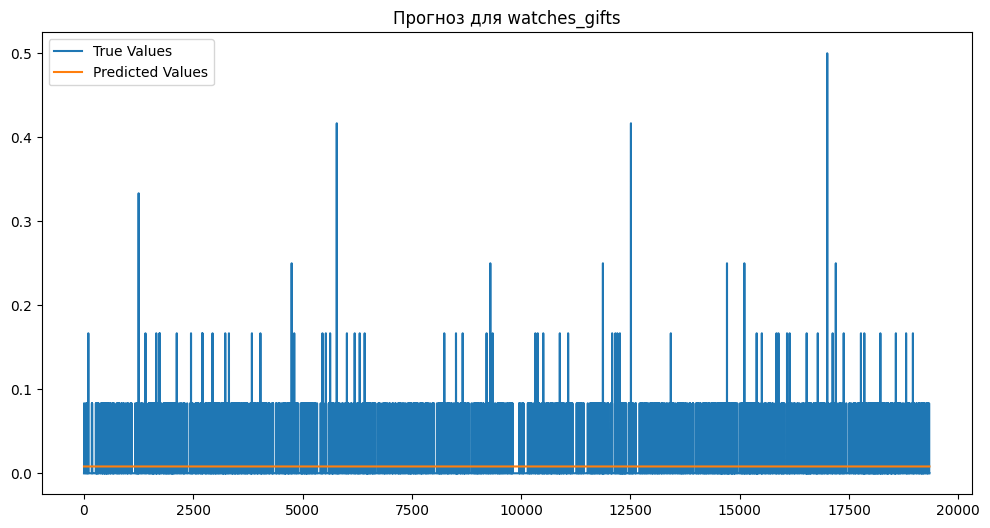

In [12]:
for column in df_pivot.columns:
    models[column].fit(X_train[column], y_train[column], batch_size=1, epochs=1)

for column in df_pivot.columns:
    loss = models[column].evaluate(X_test[column], y_test[column])
    print(f'Test Loss for {column}: {loss}')
y_pred = {}
for column in df_pivot.columns:
    y_pred[column] = models[column].predict(X_test[column])
import matplotlib.pyplot as plt

for column in df_pivot.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(y_test[column][:, 0], label='True Values')  # Припустимо, що ми візуалізуємо перший день прогнозу
    plt.plot(y_pred[column][:, 0], label='Predicted Values')
    plt.legend()
    plt.title(f'Прогноз для {column}')
    plt.show()